Supervised Learning Project                                                                                                                                                                                    by: Shimoun

Problem Statement

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

Importing the libraries

In [63]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

Importing the data

In [64]:
### Fetching the dataset

df_train = pd.read_csv('train.csv')

In [65]:
### Looking at the sample data in the dataset

df_train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [66]:
### Shape of the dataset

df_train.shape

(100000, 28)

In [67]:
df_test = pd.read_csv('test.csv')

In [68]:
df_test.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [69]:
df_test.shape

(50000, 27)

In [70]:
# combining the test and train 
df_full = pd.concat([df_train, df_test], ignore_index=True)

In [71]:
df_full.shape

(150000, 28)

Exploratory Data Analysis (EDA)

Datatypes, Missing Data, Handling outliers, and Summary Statistics

In [72]:
### Looking at the datatypes of the data

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

Here, the columns - Month, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Credit_Score are categorical. Hence, we modify the datatypes of these columns to category.

In [73]:
### Changing the datatype of the above mentioned columns to category

df_full.Month = df_full.Month.astype('category')
df_full.Occupation = df_full.Occupation.astype('category')
df_full.Type_of_Loan = df_full.Type_of_Loan.astype('category')
df_full.Credit_Mix = df_full.Credit_Mix.astype('category')
df_full.Payment_of_Min_Amount = df_full.Payment_of_Min_Amount.astype('category')
df_full.Payment_Behaviour = df_full.Payment_Behaviour.astype('category')
df_full.Credit_Score = df_full.Credit_Score.astype('category')

Looking at the modified datatypes of the columns in both the datasets.

In [74]:
### Looking at the modified datatypes of the data

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  category
 3   Name                      135000 non-null  object  
 4   Age                       150000 non-null  object  
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  category
 7   Annual_Income             150000 non-null  object  
 8   Monthly_Inhand_Salary     127500 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  int64   
 10  Num_Credit_Card           150000 non-null  int64   
 11  Interest_Rate             150000 non-null  int64   
 12  Num_of_Loan               150000 non-null  object  
 13  Type_of_Loan              132

In [75]:
df_full.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Removing Anomalies from the data

In [76]:
def remove_underscores(val):
    new_val = (val.replace('_', '').replace(' ', '').replace("'", ''))
    if new_val == '' :
        return np.nan
    else: 
        return new_val  
def modifyData(columns):
    for each_column in columns:
        data = [str(value) for value in list(df_full[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(remove_underscores(value)))
        
        df_full[each_column] = new_data

modifyData(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit',
           'Amount_invested_monthly', 'Monthly_Balance'])      

In [77]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  category
 3   Name                      135000 non-null  object  
 4   Age                       150000 non-null  float64 
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  category
 7   Annual_Income             150000 non-null  float64 
 8   Monthly_Inhand_Salary     127500 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  int64   
 10  Num_Credit_Card           150000 non-null  int64   
 11  Interest_Rate             150000 non-null  int64   
 12  Num_of_Loan               150000 non-null  float64 
 13  Type_of_Loan              132

In [78]:
df_full.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,NaN,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [79]:
df_full.describe(include=('category','object') )

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,150000,150000,150000,135000,150000,150000,132888,150000,136500,150000,150000,100000
unique,150000,12500,12,10139,12501,16,6260,4,408,3,7,3
top,0x1602,CUS_0xd40,April,Stevex,#F%$D@*&8,_______,Not Specified,Standard,17 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,12,12500,66,8400,10500,2112,54858,628,78484,38207,53174


Mode Imputation

In [80]:
df_uniqcus = pd.DataFrame()

def mode_occupation(data):
    return data[('Occupation')].mode()[0] 
df_uniqcus['Occupation'] = df_full.groupby('Customer_ID').apply(mode_occupation) 

def mode_SSN(data):
    return data[('SSN')].mode()[0] 
df_uniqcus['SSN'] = df_full.groupby('Customer_ID').apply(mode_SSN) 

def mode_Payment_Behaviour(data):
    return data[('Payment_Behaviour')].mode()[0] 
df_uniqcus['Payment_Behaviour'] = df_full.groupby('Customer_ID').apply(mode_Payment_Behaviour) 

In [82]:
df_uniqcus.head(15)
#table with mode info 

,Occupation,SSN,Payment_Behaviour
Customer_ID,,,
CUS_0x1000,Lawyer,913-74-1218,High_spent_Small_value_payments
CUS_0x1009,Mechanic,063-67-6938,High_spent_Medium_value_payments
CUS_0x100b,Media_Manager,238-62-0395,High_spent_Large_value_payments
CUS_0x1011,Doctor,793-05-8223,High_spent_Medium_value_payments
CUS_0x1013,Mechanic,930-49-9615,High_spent_Medium_value_payments
CUS_0x1015,Journalist,810-97-7024,Low_spent_Medium_value_payments
CUS_0x1018,Accountant,731-19-8119,High_spent_Medium_value_payments
CUS_0x1026,Manager,500-62-9044,High_spent_Medium_value_payments
CUS_0x102d,Entrepreneur,692-71-7552,Low_spent_Medium_value_payments


Removing Typing errors as '!@9#%8' and replacing them with Customer mode

In [83]:
df_full['Occupation'] = df_full['Customer_ID'].map(df_uniqcus['Occupation'])
df_full['SSN'] = df_full['Customer_ID'].map(df_uniqcus['SSN'])

# payment behaviour may vary for multiple loans which will give us a unique value every time 
df_full.replace('!@9#%8', df_full['Customer_ID'].map(df_uniqcus['Payment_Behaviour']),inplace=True)

In [84]:
# annomalies removed
df_full.describe(include=('category','object') )

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,150000,150000,150000,135000,150000,150000,132888,150000,136500,150000,150000,100000
unique,150000,12500,12,10139,12500,15,6260,4,408,3,7,3
top,0x1602,CUS_0xd40,April,Stevex,821-00-0265,Lawyer,Not Specified,Standard,17 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,12,12500,66,12,10644,2112,54858,628,78484,38207,53174


In [85]:
df_full['Occupation'].value_counts()

Occupation
Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: count, dtype: int64

In [86]:
df_full['SSN'].value_counts()

SSN
821-00-0265    12
544-05-0223    12
381-36-5261    12
994-73-1178    12
647-44-9598    12
               ..
936-12-2774    12
091-61-1869    12
576-38-5212    12
281-30-1712    12
078-73-5990    12
Name: count, Length: 12500, dtype: int64

In [87]:
df_full['Payment_Behaviour'].value_counts() 
# Payment_Behaviour still has !@9#%8 we can treat it by replacing it with mode of entire column


Payment_Behaviour
Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: count, dtype: int64

In [88]:
df_full.replace('!@9#%8', df_full['Payment_Behaviour'].mode()[0],inplace=True)

In [89]:
df_full['Payment_Behaviour'].value_counts() 

Payment_Behaviour
Low_spent_Small_value_payments      49607
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
Name: count, dtype: int64

In [90]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  category
 3   Name                      135000 non-null  object  
 4   Age                       150000 non-null  float64 
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  object  
 7   Annual_Income             150000 non-null  float64 
 8   Monthly_Inhand_Salary     127500 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  int64   
 10  Num_Credit_Card           150000 non-null  int64   
 11  Interest_Rate             150000 non-null  int64   
 12  Num_of_Loan               150000 non-null  float64 
 13  Type_of_Loan              132

In [91]:
df_full.Occupation = df_full.Occupation.astype('category')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  category
 3   Name                      135000 non-null  object  
 4   Age                       150000 non-null  float64 
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  category
 7   Annual_Income             150000 non-null  float64 
 8   Monthly_Inhand_Salary     127500 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  int64   
 10  Num_Credit_Card           150000 non-null  int64   
 11  Interest_Rate             150000 non-null  int64   
 12  Num_of_Loan               150000 non-null  float64 
 13  Type_of_Loan              132

In [92]:
#all numerical columns 
df_numerical = pd.DataFrame.select_dtypes(self=df_full,include= 'number')
df_numerical.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,143250.000000,1.482380e+05
mean,110.337940,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,3.141093,21.063400,30.911878,10.384299,28.529014,1426.220376,32.283309,1432.513579,638.826309,-3.372954e+22
std,684.066779,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,63.910655,14.860154,224.534007,6.786522,194.456058,1155.127101,5.113315,8403.759977,2046.843019,3.352927e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,30.947775,74.533842,2.702297e+02
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,135.791445,3.367995e+02
75%,42.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,266.110841,4.704553e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,10000.000000,1.606518e+03


Removing anomalies from numerical columns if any.

In [93]:
#modifying all numberical columns to remove spaces , _ , '  
modifyData(df_full.select_dtypes(include= 'number'))

In [94]:
df_numerical_new = pd.DataFrame.select_dtypes(self=df_full,include= 'number')
df_numerical_new.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,143250.000000,1.482380e+05
mean,110.337940,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,3.141093,21.063400,30.911878,10.384299,28.529014,1426.220376,32.283309,1432.513579,638.826309,-3.372954e+22
std,684.066779,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,63.910655,14.860154,224.534007,6.786522,194.456058,1155.127101,5.113315,8403.759977,2046.843019,3.352927e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,30.947775,74.533842,2.702297e+02
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,135.791445,3.367995e+02
75%,42.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,266.110841,4.704553e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,10000.000000,1.606518e+03


Median Imputation

In [95]:
def median_Age(data):
    return data['Age'].median()
df_uniqcus['Age'] = df_full.groupby('Customer_ID').apply(median_Age)


df_full.loc[df_full['Age']>100,'Age'] =  df_full['Customer_ID'].map(df_uniqcus['Age'])
df_full.loc[df_full['Age']< 0,'Age'] =  df_full['Customer_ID'].map(df_uniqcus['Age'])

In [96]:
df_full.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,143250.000000,1.482380e+05
mean,33.482763,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,3.141093,21.063400,30.911878,10.384299,28.529014,1426.220376,32.283309,1432.513579,638.826309,-3.372954e+22
std,10.775386,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,63.910655,14.860154,224.534007,6.786522,194.456058,1155.127101,5.113315,8403.759977,2046.843019,3.352927e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,30.947775,74.533842,2.702297e+02
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,135.791445,3.367995e+02
75%,42.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,266.110841,4.704553e+02
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,10000.000000,1.606518e+03


In [97]:
#checking if _ is removed from the CUS_0x21b1 customers annual_income 
# this was done by modifyData
customer_income = [df_full.loc[df_full['Customer_ID'] == 'CUS_0x21b1', 'Annual_Income']]
customer_income

[8         34847.84
 9         34847.84
 10        34847.84
 11        34847.84
 12        34847.84
 13        34847.84
 14        34847.84
 15        34847.84
 100004    34847.84
 100005    34847.84
 100006    34847.84
 100007    34847.84
 Name: Annual_Income, dtype: float64]

In [98]:

def median_neg_1(data):
    return data['Num_Bank_Accounts'].median()
df_uniqcus['Num_Bank_Accounts'] = df_full.groupby('Customer_ID').apply(median_neg_1)

df_full.loc[df_full['Num_Bank_Accounts'] < 0,'Num_Bank_Accounts'] =  df_full['Customer_ID'].map(df_uniqcus['Num_Bank_Accounts'])

def median_neg_2(data):
    return data['Num_of_Loan'].median()
df_uniqcus['Num_of_Loan'] = df_full.groupby('Customer_ID').apply(median_neg_2)

df_full.loc[df_full['Num_of_Loan'] < 0,'Num_of_Loan'] =  df_full['Customer_ID'].map(df_uniqcus['Num_of_Loan'])

def median_neg_3(data):
    return data['Delay_from_due_date'].median()
df_uniqcus['Delay_from_due_date'] = df_full.groupby('Customer_ID').apply(median_neg_3)

df_full.loc[df_full['Delay_from_due_date']< 0,'Delay_from_due_date'] =  df_full['Customer_ID'].map(df_uniqcus['Delay_from_due_date'])

def median_neg_4(data):
    return data['Num_of_Delayed_Payment'].median()
df_uniqcus['Num_of_Delayed_Payment'] = df_full.groupby('Customer_ID').apply(median_neg_4)

df_full.loc[df_full['Num_of_Delayed_Payment'] < 0,'Num_of_Delayed_Payment'] =  df_full['Customer_ID'].map(df_uniqcus['Num_of_Delayed_Payment'])

def median_neg_5(data):
    return data['Changed_Credit_Limit'].median()
df_uniqcus['Changed_Credit_Limit'] = df_full.groupby('Customer_ID').apply(median_neg_5)

df_full.loc[df_full['Changed_Credit_Limit'] < 0,'Changed_Credit_Limit'] =  df_full['Customer_ID'].map(df_uniqcus['Changed_Credit_Limit'])

def median_neg_6(data):
    return data['Monthly_Balance'].median()
df_uniqcus['Monthly_Balance'] = df_full.groupby('Customer_ID').apply(median_neg_6)

df_full.loc[df_full['Monthly_Balance'] < 0,'Monthly_Balance'] =  df_full['Customer_ID'].map(df_uniqcus['Monthly_Balance'])


In [99]:
# most of the data is cured.
df_full.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,143250.000000,148238.000000
mean,33.482763,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,7.178280,21.085053,30.927534,10.470040,28.529014,1426.220376,32.283309,1432.513579,638.826309,402.727559
std,10.775386,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,60.445193,14.828805,224.531816,6.656144,194.456058,1155.127101,5.113315,8403.759977,2046.843019,213.845150
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.360000,3.000000,566.072500,28.054731,30.947775,74.533842,270.245619
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,135.791445,336.820310
75%,42.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,266.110841,470.479090
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,10000.000000,1606.518192


Converting Dates into floationg values

In [100]:
#step 5 
def date_conver(val):
    new_val = val.replace(" Years and ", ".").replace(" Months", "")
    if new_val == '' :
        return np.nan 
    elif new_val == 'NA':
        return np.nan 
    else:
        return new_val
def date_modi(col):
    for i in col:
        data = [str(value) for value in list(df_full[i])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(date_conver(value)))
        
        df_full[i] = new_data

date_modi(["Credit_History_Age"])

In [101]:
df_full.Credit_History_Age

0         22.10
1           NaN
2         22.30
3         22.40
4         22.50
          ...  
149995      NaN
149996    31.11
149997    32.00
149998    32.10
149999    32.20
Name: Credit_History_Age, Length: 150000, dtype: float64

In [102]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  category
 3   Name                      135000 non-null  object  
 4   Age                       150000 non-null  float64 
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  category
 7   Annual_Income             150000 non-null  float64 
 8   Monthly_Inhand_Salary     127500 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  float64 
 10  Num_Credit_Card           150000 non-null  float64 
 11  Interest_Rate             150000 non-null  float64 
 12  Num_of_Loan               150000 non-null  float64 
 13  Type_of_Loan              132

In [104]:
df_full.Type_of_Loan.value_counts()# there are multiple loans taken by a single person 

Type_of_Loan
Not Specified                                                                                                        2112
Credit-Builder Loan                                                                                                  1920
Personal Loan                                                                                                        1908
Debt Consolidation Loan                                                                                              1896
Student Loan                                                                                                         1860
                                                                                                                     ... 
Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, and Home Equity Loan                                   12
Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, and Credit-Builder Loan                                12
Home Equity

Various kinds of loans

In [106]:
Index_values = ~df_full['Type_of_Loan'].isnull().values
loan_type_data = list(df_full['Type_of_Loan'][Index_values])
loan_type_data
loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 56988,
 'Credit-Builder Loan': 60660,
 'Personal Loan': 58332,
 'Home Equity Loan': 58656,
 'Not Specified': 59424,
 'Mortgage Loan': 58404,
 'Student Loan': 58452,
 'Debt Consolidation Loan': 58164,
 'Payday Loan': 60852}

In [108]:
credit_mix_count = df_full['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Credit_Mix
Standard    54858
Good        36597
_           30000
Bad         28545
Name: count, dtype: int64

Imputing categorical columns with customer wise mode

In [127]:
def impute_with_cust_mode(group):
    return group.replace('_',group.mode()[0])
df_full['Credit_Mix'] = df_full.groupby('Customer_ID')['Credit_Mix'].transform(impute_with_cust_mode).astype('category')

In [128]:
# most values are sorted for
credit_mix_countn = df_full['Credit_Mix'].value_counts(dropna = False)
credit_mix_countn

Credit_Mix
Standard    68581
Good        45481
Bad         35552
_             386
Name: count, dtype: int64

In [113]:
### Missing data by columns in the dataset
df_full.isnull().sum().sort_values(ascending = False)

Credit_Score                50000
Monthly_Inhand_Salary       22500
Type_of_Loan                17112
Name                        15000
Credit_History_Age          13500
Num_of_Delayed_Payment      10500
Amount_invested_monthly      6750
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Monthly_Balance              1762
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
ID                              0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Delay_from_due_date             0
dtype: int64

From the above data, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Name, Credit_History_Age, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries, Monthly_Balance. Now, lets look where these missing values are present in these columns i.e., whether these values are clustered at a single place or scattered in the data.

<Axes: >

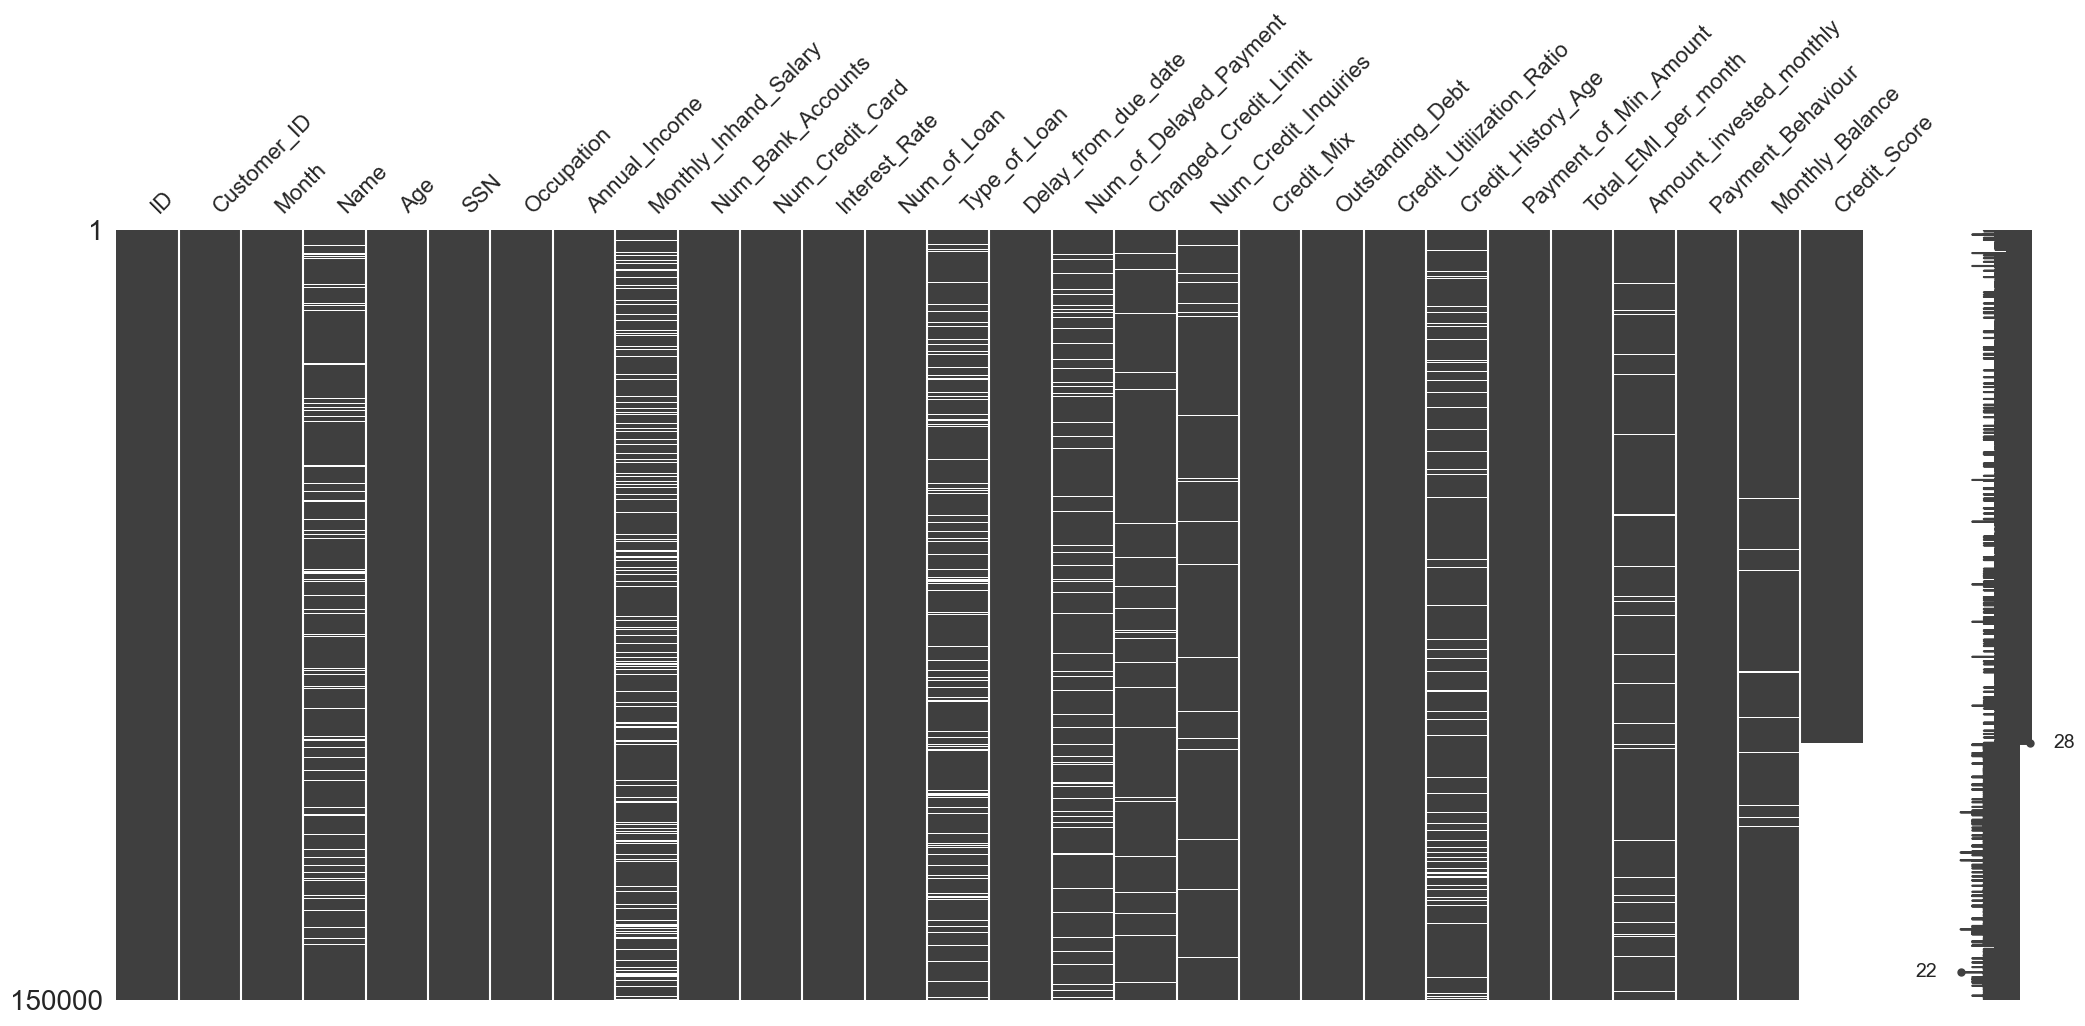

In [114]:
### Visual representation of the missing data in the dataset

missingno.matrix(df_full)

In [129]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  category
 3   Name                      150000 non-null  object  
 4   Age                       150000 non-null  float64 
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  category
 7   Annual_Income             150000 non-null  float64 
 8   Monthly_Inhand_Salary     150000 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  float64 
 10  Num_Credit_Card           150000 non-null  float64 
 11  Interest_Rate             150000 non-null  float64 
 12  Num_of_Loan               150000 non-null  float64 
 13  Type_of_Loan              132

In [130]:
def impute_with_customer_median(group):
    return group.fillna(group.median())
# 'Type_of_Loan'
# Group by customer_id and apply the imputation function
df_full[['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Amount_invested_monthly','Num_Credit_Inquiries','Credit_History_Age','Monthly_Balance']] = df_full.groupby('Customer_ID')[['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Amount_invested_monthly','Num_Credit_Inquiries','Credit_History_Age','Monthly_Balance']].transform(impute_with_customer_median)

In [131]:
# for categorical columns .as median transformations is not possible.
def impute_with_customer_mode(group):
    return group.fillna(group.mode().iloc[0] if not group.mode().empty else np.nan)
df_full[['Name','Type_of_Loan']] = df_full.groupby('Customer_ID')[['Name','Type_of_Loan']].transform(impute_with_customer_mode)

<Axes: >

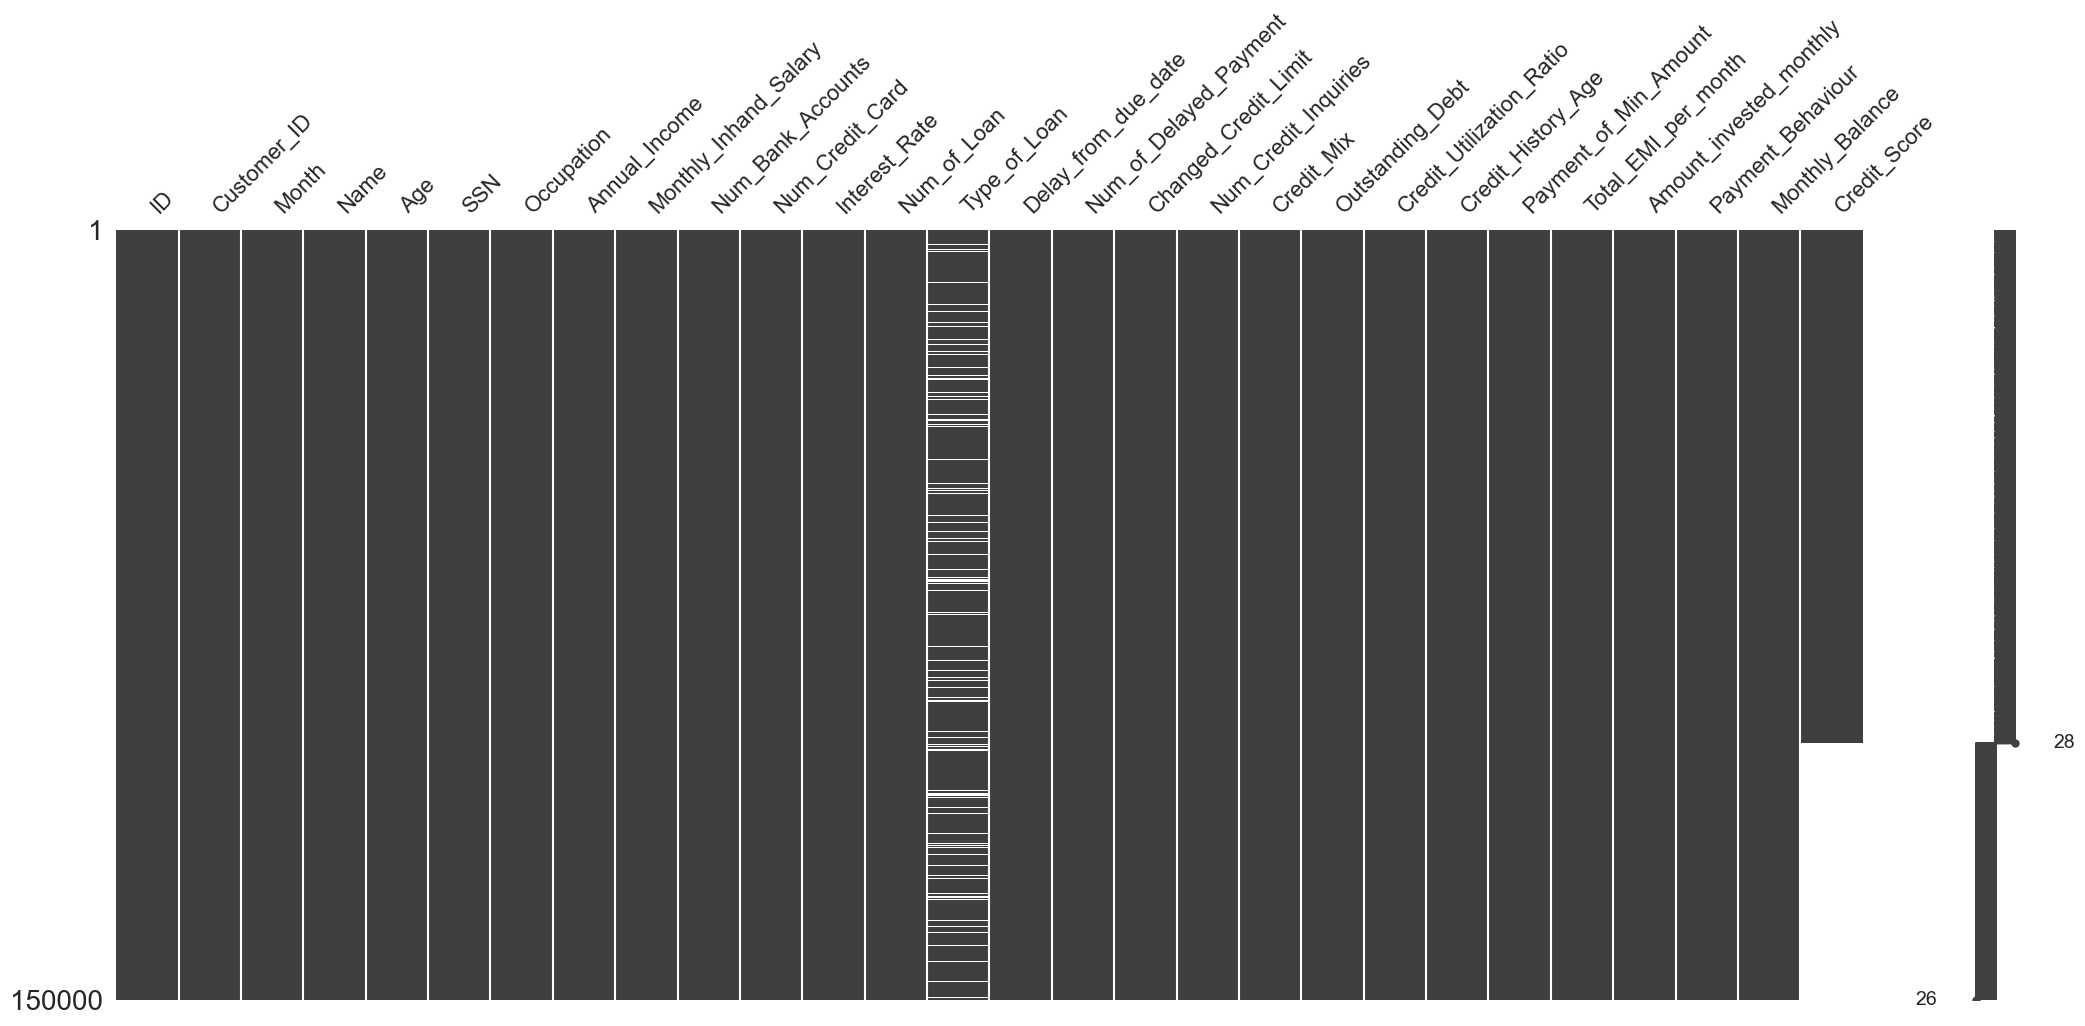

In [132]:
missingno.matrix(df_full)

In [133]:
df_full.isnull().sum().sort_values(ascending = False)

Credit_Score                50000
Type_of_Loan                17112
Num_of_Delayed_Payment          0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Num_Credit_Inquiries            0
Changed_Credit_Limit            0
ID                              0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Monthly_Inhand_Salary           0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Name                            0
Month                           0
Delay_from_due_date             0
dtype: int64

In [119]:
df_full.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,33.482763,1.730552e+05,4192.647084,17.006940,22.623447,71.234907,7.178280,21.085053,29.695367,10.470277,28.082727,1426.220376,32.283309,18.538772,1432.513579,618.080440,403.597660
std,10.775386,1.404215e+06,3182.841234,117.069476,129.143006,461.537193,60.445193,14.828805,216.583383,6.654246,192.527840,1155.127101,5.113315,8.315153,8403.759977,2002.722290,214.182501
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,0.007760
25%,25.000000,1.945549e+04,1625.558333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.370000,3.000000,566.072500,28.054731,12.110000,30.947775,75.488657,270.458129
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.297058,18.400000,71.280006,135.969097,337.426525
75%,42.000000,7.279690e+04,5951.373333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.830000,9.000000,1945.962500,36.487954,25.200000,166.279555,263.156781,472.138434
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,34.000000,82398.000000,10000.000000,1606.518192


data is clean and ready to use.

In [134]:
df_full['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

seperating the data sets 

In [135]:
# seperating the data sets 
df_clean_train = df_full[df_full['Credit_Score'] .notna()]
df_clean_test = df_full[df_full['Credit_Score'].isna()]
print('shape of clean train data : ',df_clean_train.shape )
print('shape of clean test data : ',df_clean_test.shape )

shape of clean train data :  (100000, 28)
shape of clean test data :  (50000, 28)


In [136]:
df_clean_train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [137]:
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      100000 non-null  object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     100000 non-null  float64 
 9   Num_Bank_Accounts         100000 non-null  float64 
 10  Num_Credit_Card           100000 non-null  float64 
 11  Interest_Rate             100000 non-null  float64 
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              88592 non

In [138]:
df_clean_train.select_dtypes(include='category').columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [139]:
df_clean_train['Occupation'].name

'Occupation'

Visual Analysis

Univariate analysis

In [140]:
# function for categorical feature w.r.t target column visual representation.
def plot_categorical(col,data,target):
    count_leb = col.value_counts(dropna = False)
    sns.set(rc = {'figure.figsize': (20, 10)})
    sns.barplot( x=count_leb.index,y=count_leb.values)
    plt.title(f'Bar graph showing the value counts of the column -{col.name}')
    plt.ylabel('Count', fontsize = 12)
    plt.xlabel({col.name}, fontsize = 12)
    print (f'Univariate analysis of Credit Score w.r.t. {col.name}')
    sns.catplot(col= col.name ,data=data, x=target.name,kind="count",col_wrap= 4)
    plt.show()

Univariate analysis of Credit Score w.r.t. Occupation


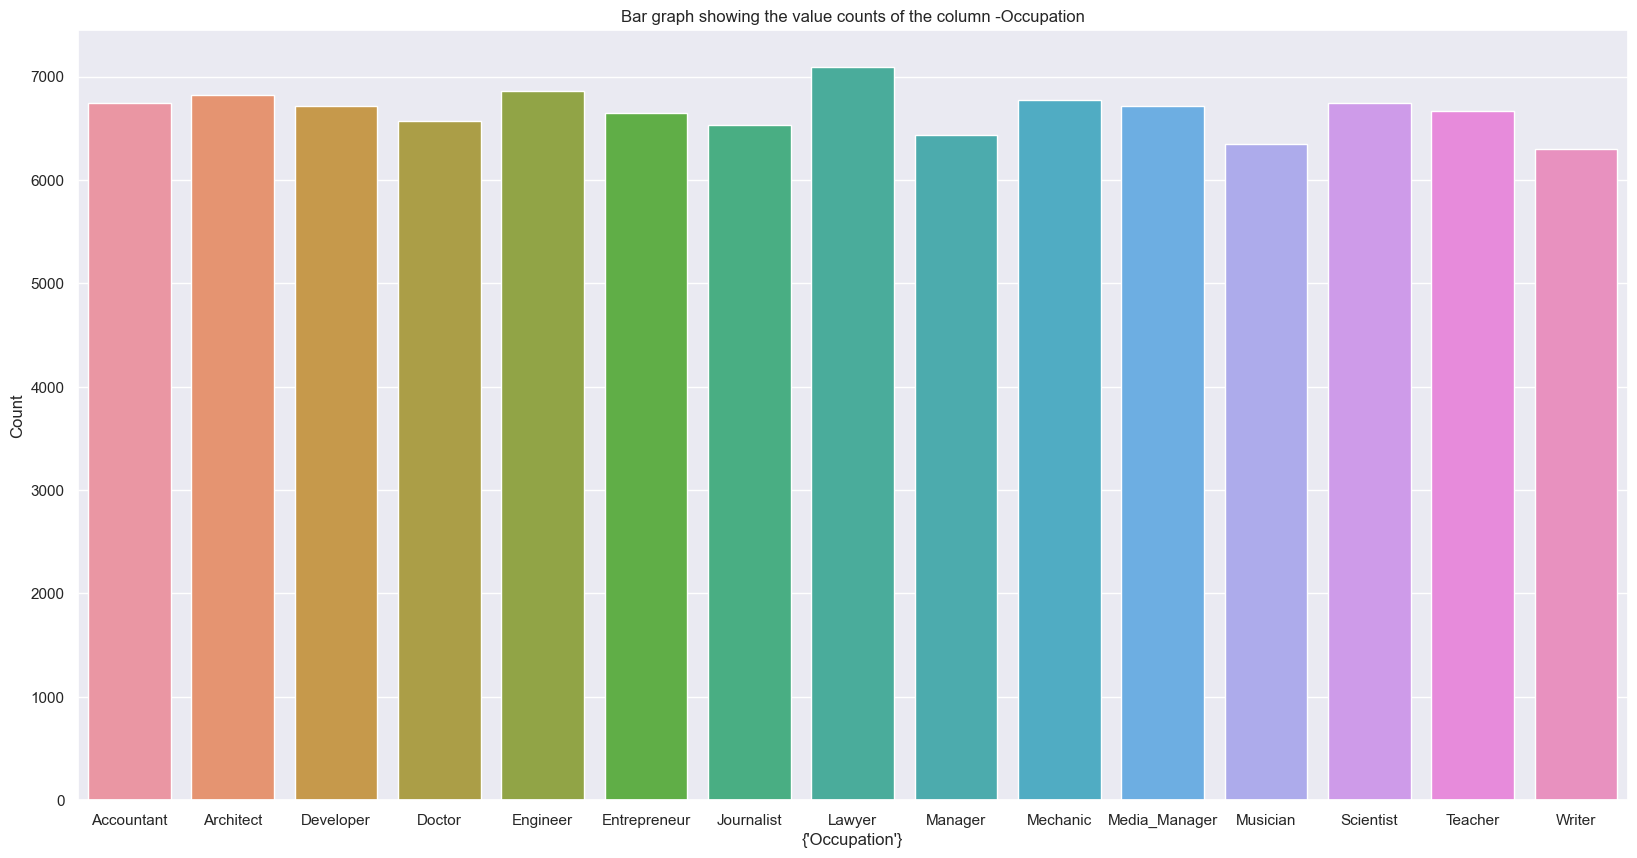

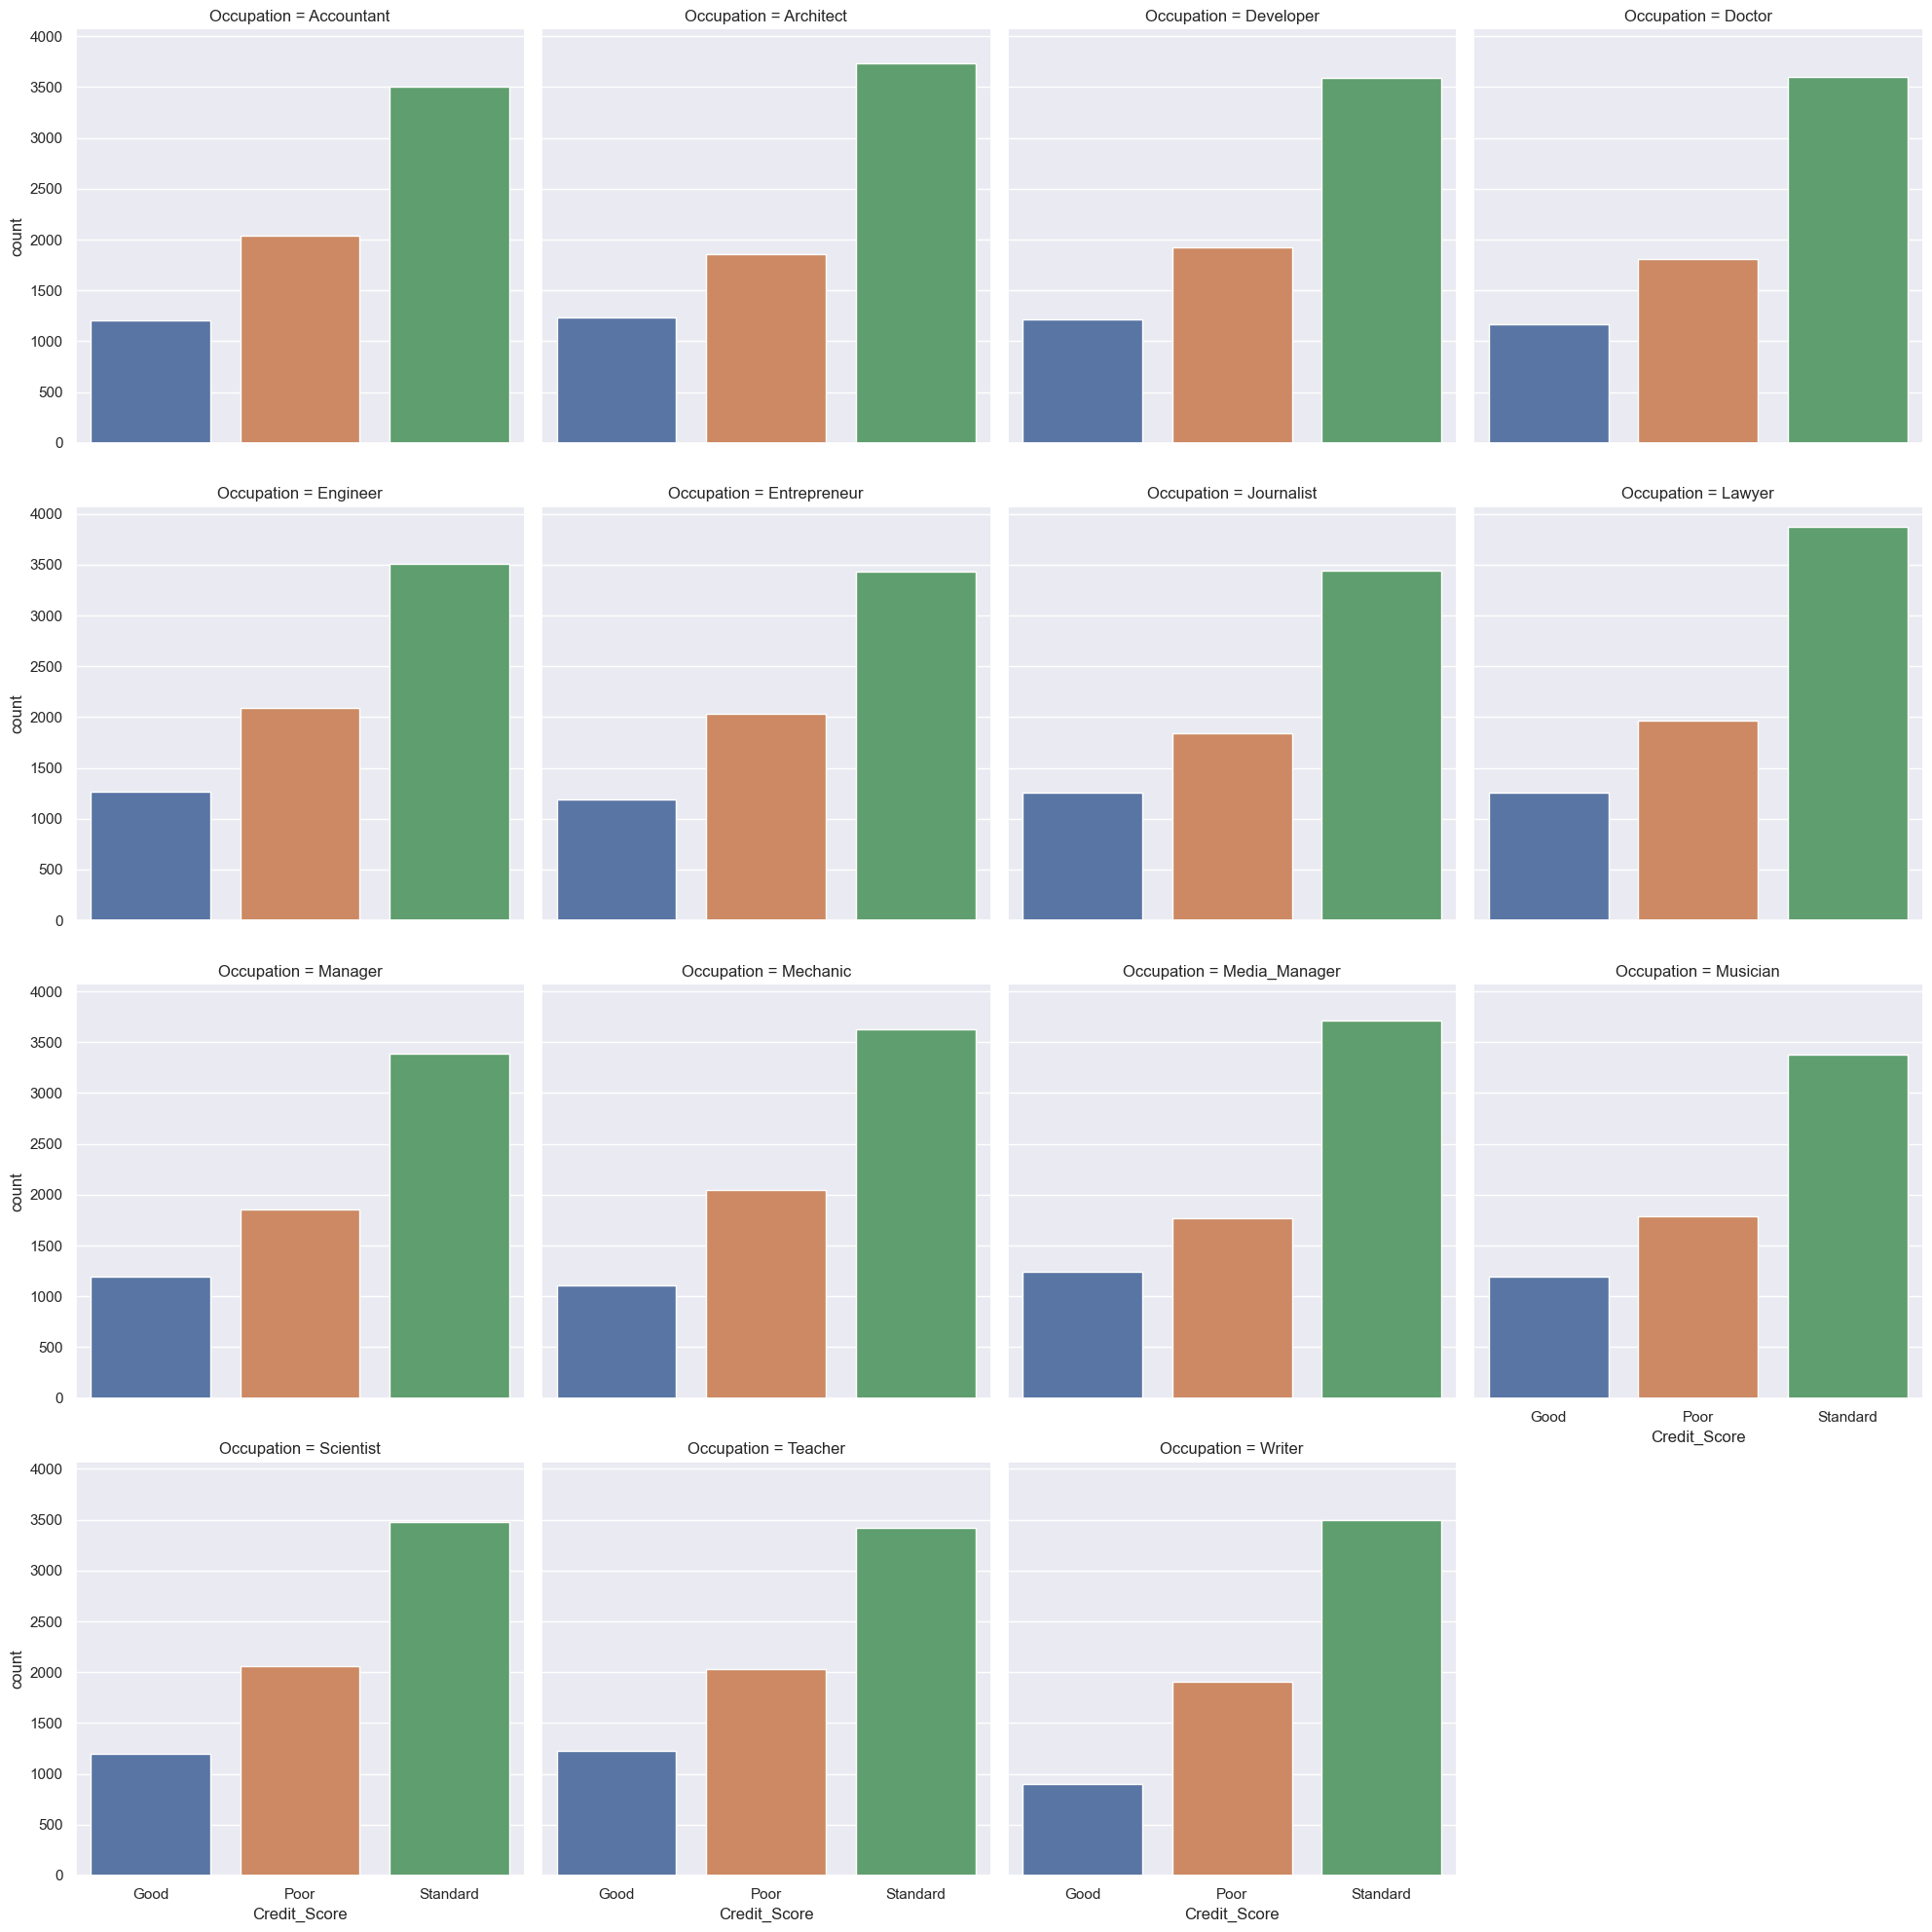

In [141]:
plot_categorical(col=df_clean_train['Occupation'],data= df_clean_train,target=df_clean_train['Credit_Score'])

Univariate analysis of Credit Score w.r.t. Credit_Mix


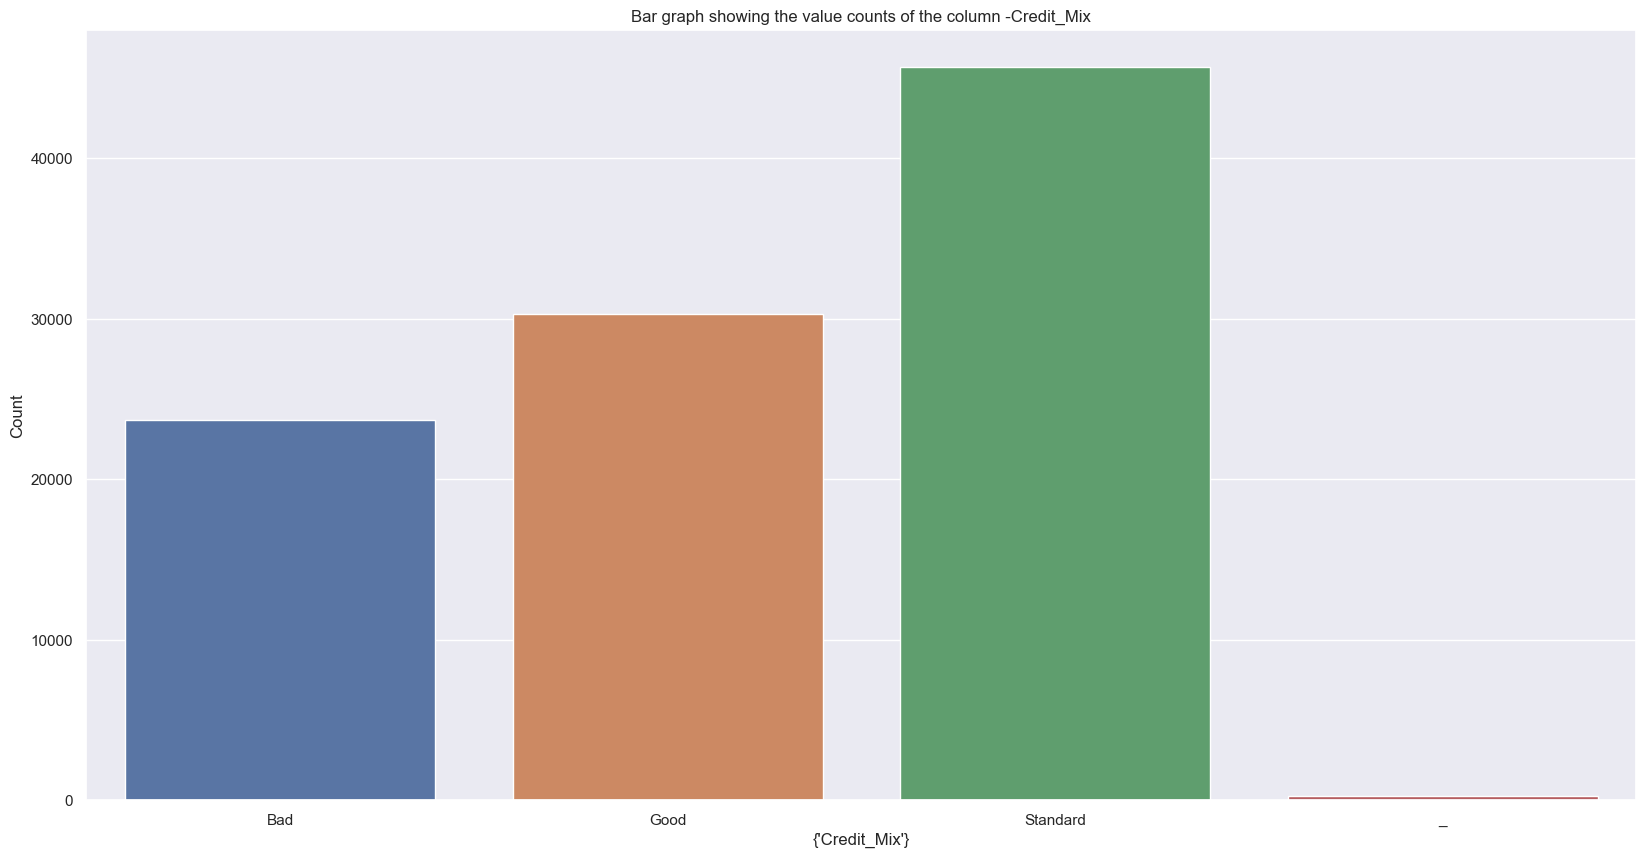

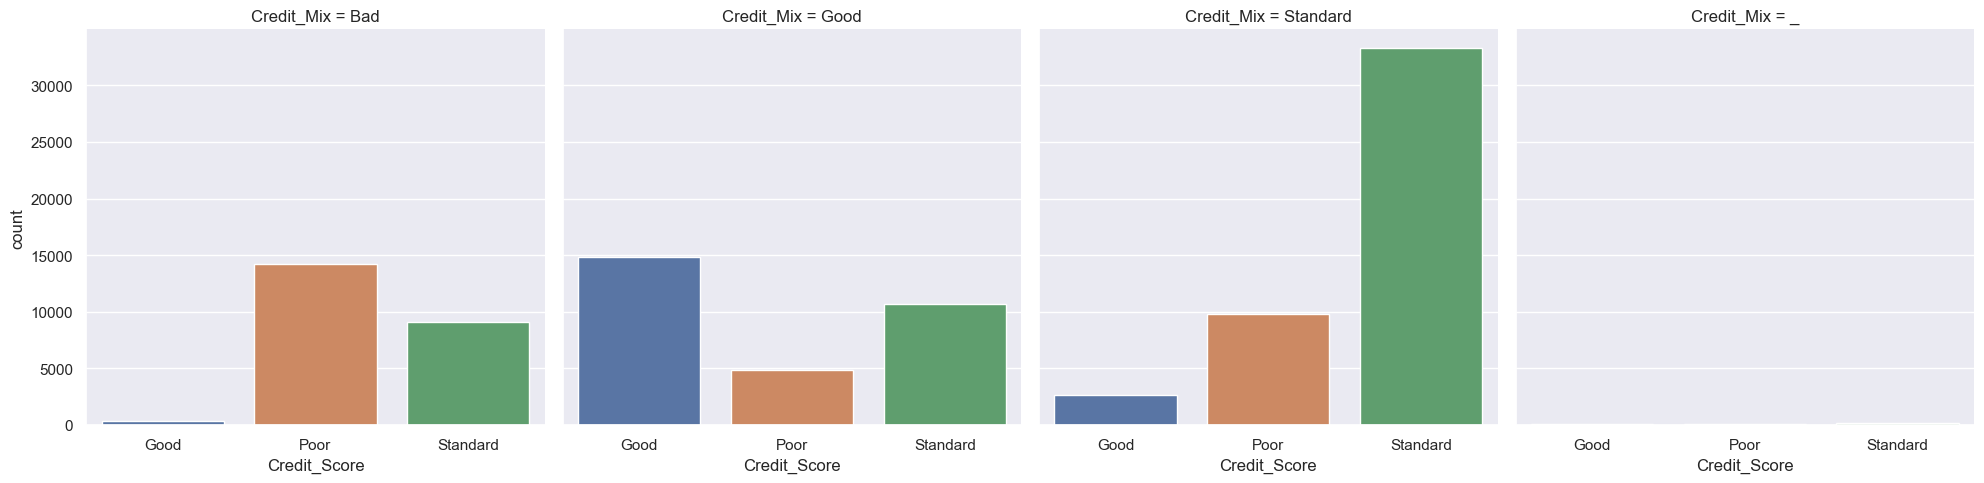

In [143]:
plot_categorical(col=df_clean_train['Credit_Mix'],data= df_clean_train,target=df_clean_train['Credit_Score'])

In [144]:
df_clean_train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

Univariate analysis of Credit Score w.r.t. Payment_of_Min_Amount


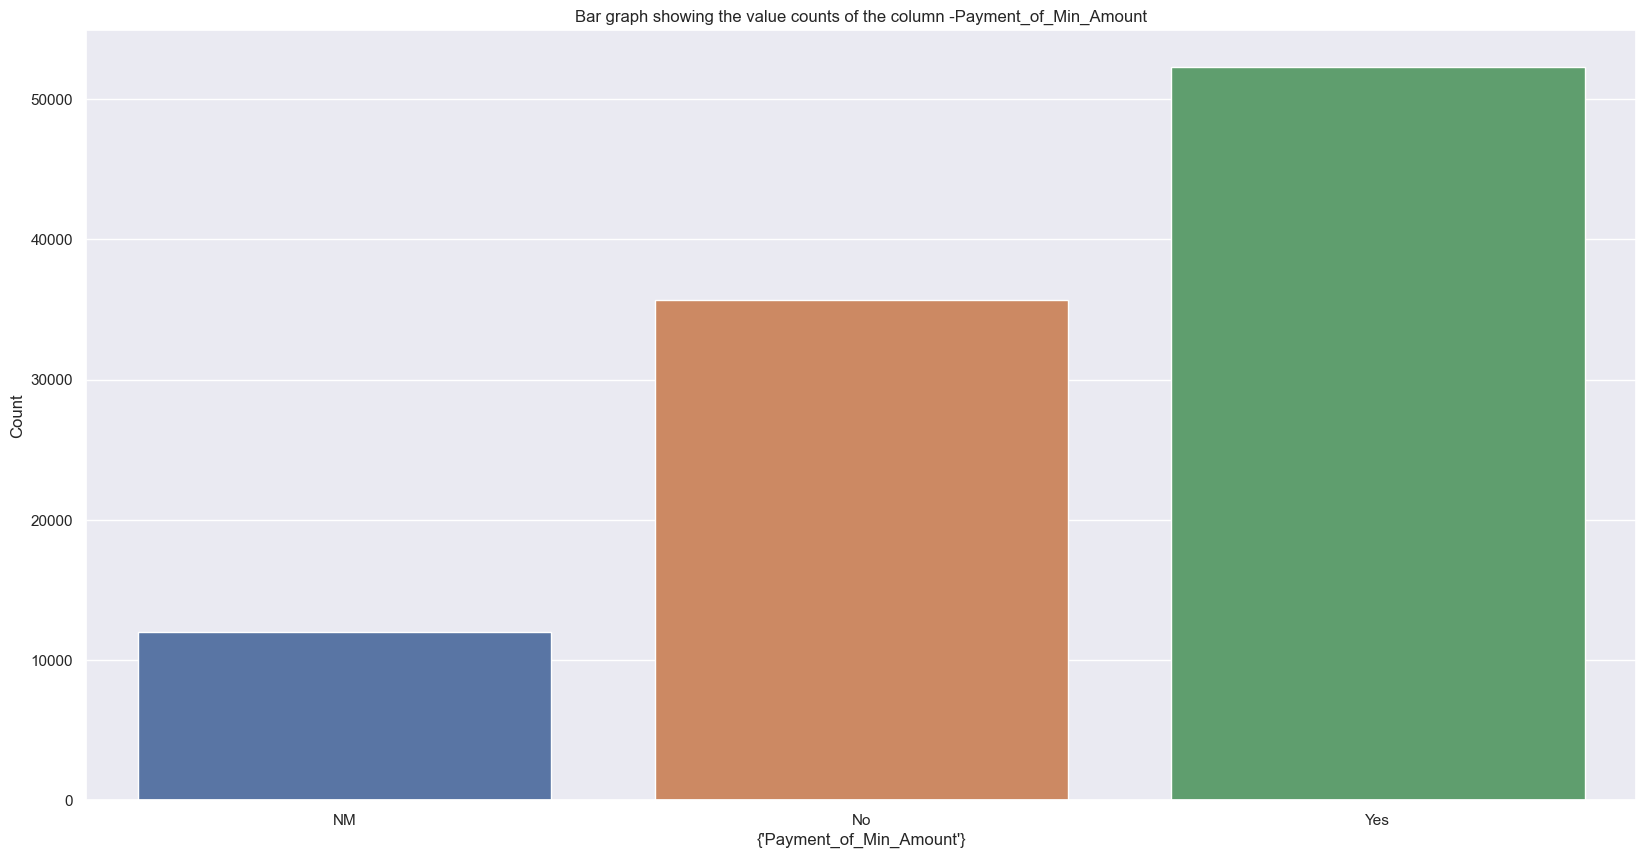

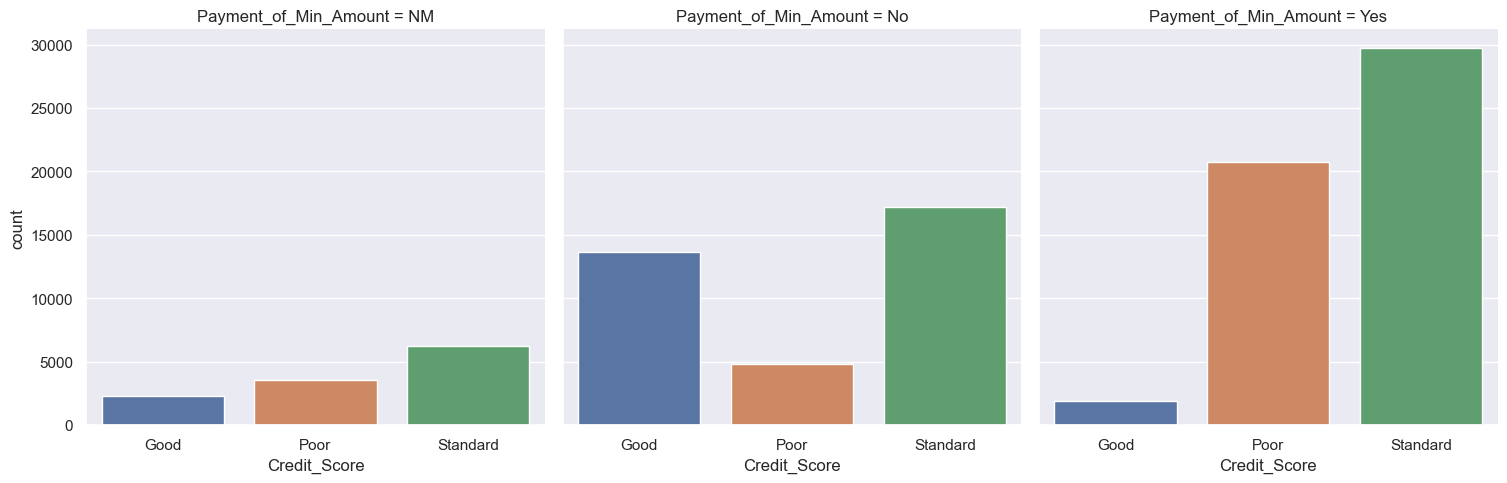

In [145]:
plot_categorical(col=df_clean_train['Payment_of_Min_Amount'],data= df_clean_train,target=df_clean_train['Credit_Score'])

In [146]:
df_clean_train.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

Univariate analysis of Credit Score w.r.t. Payment_Behaviour


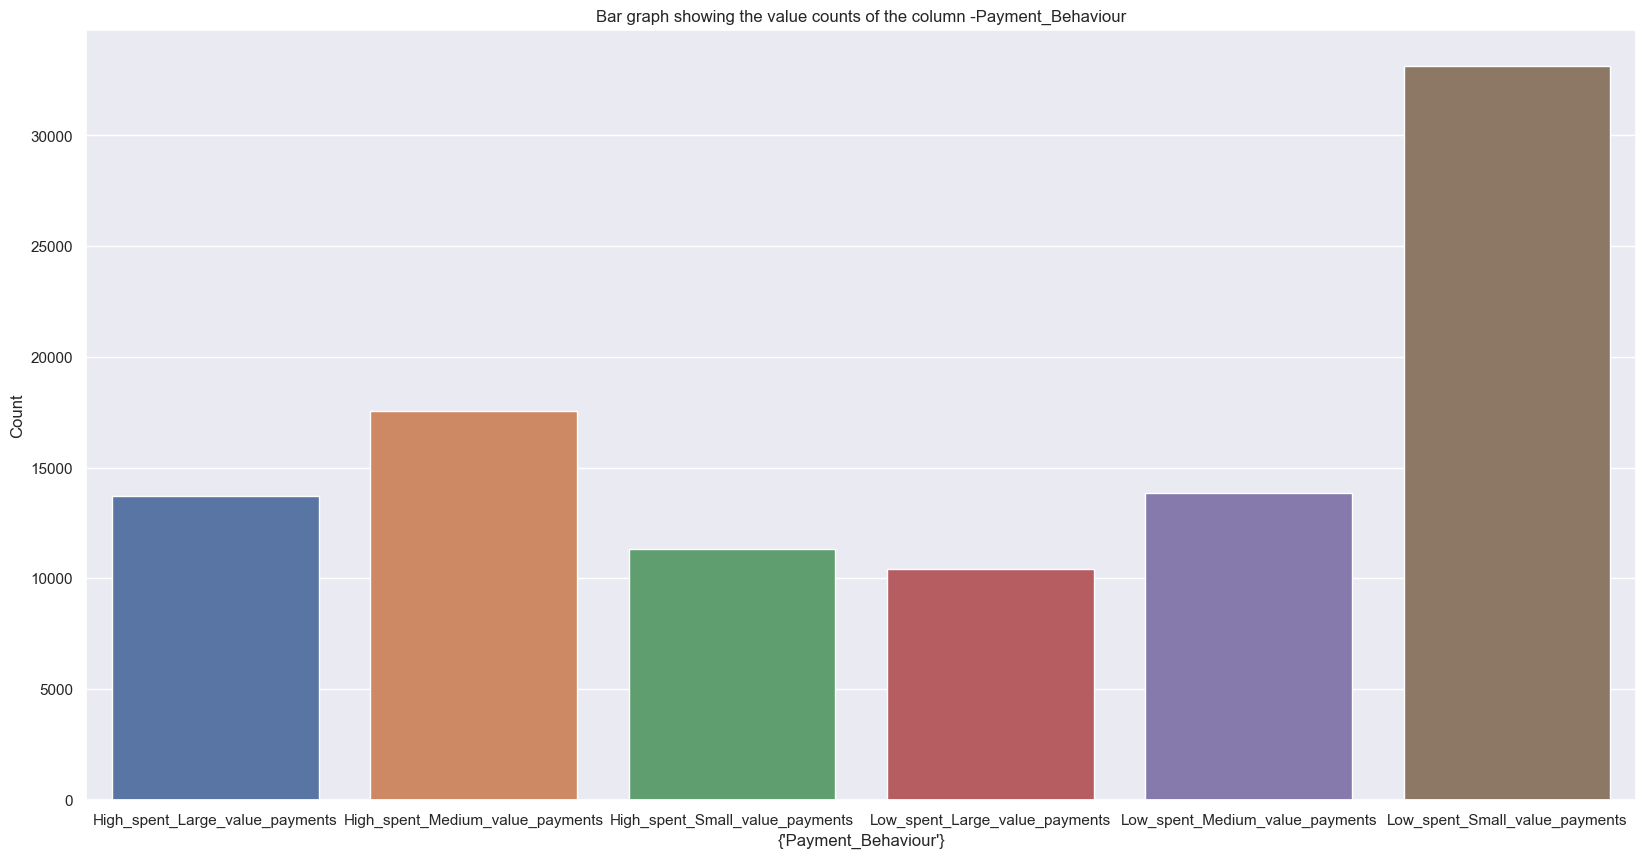

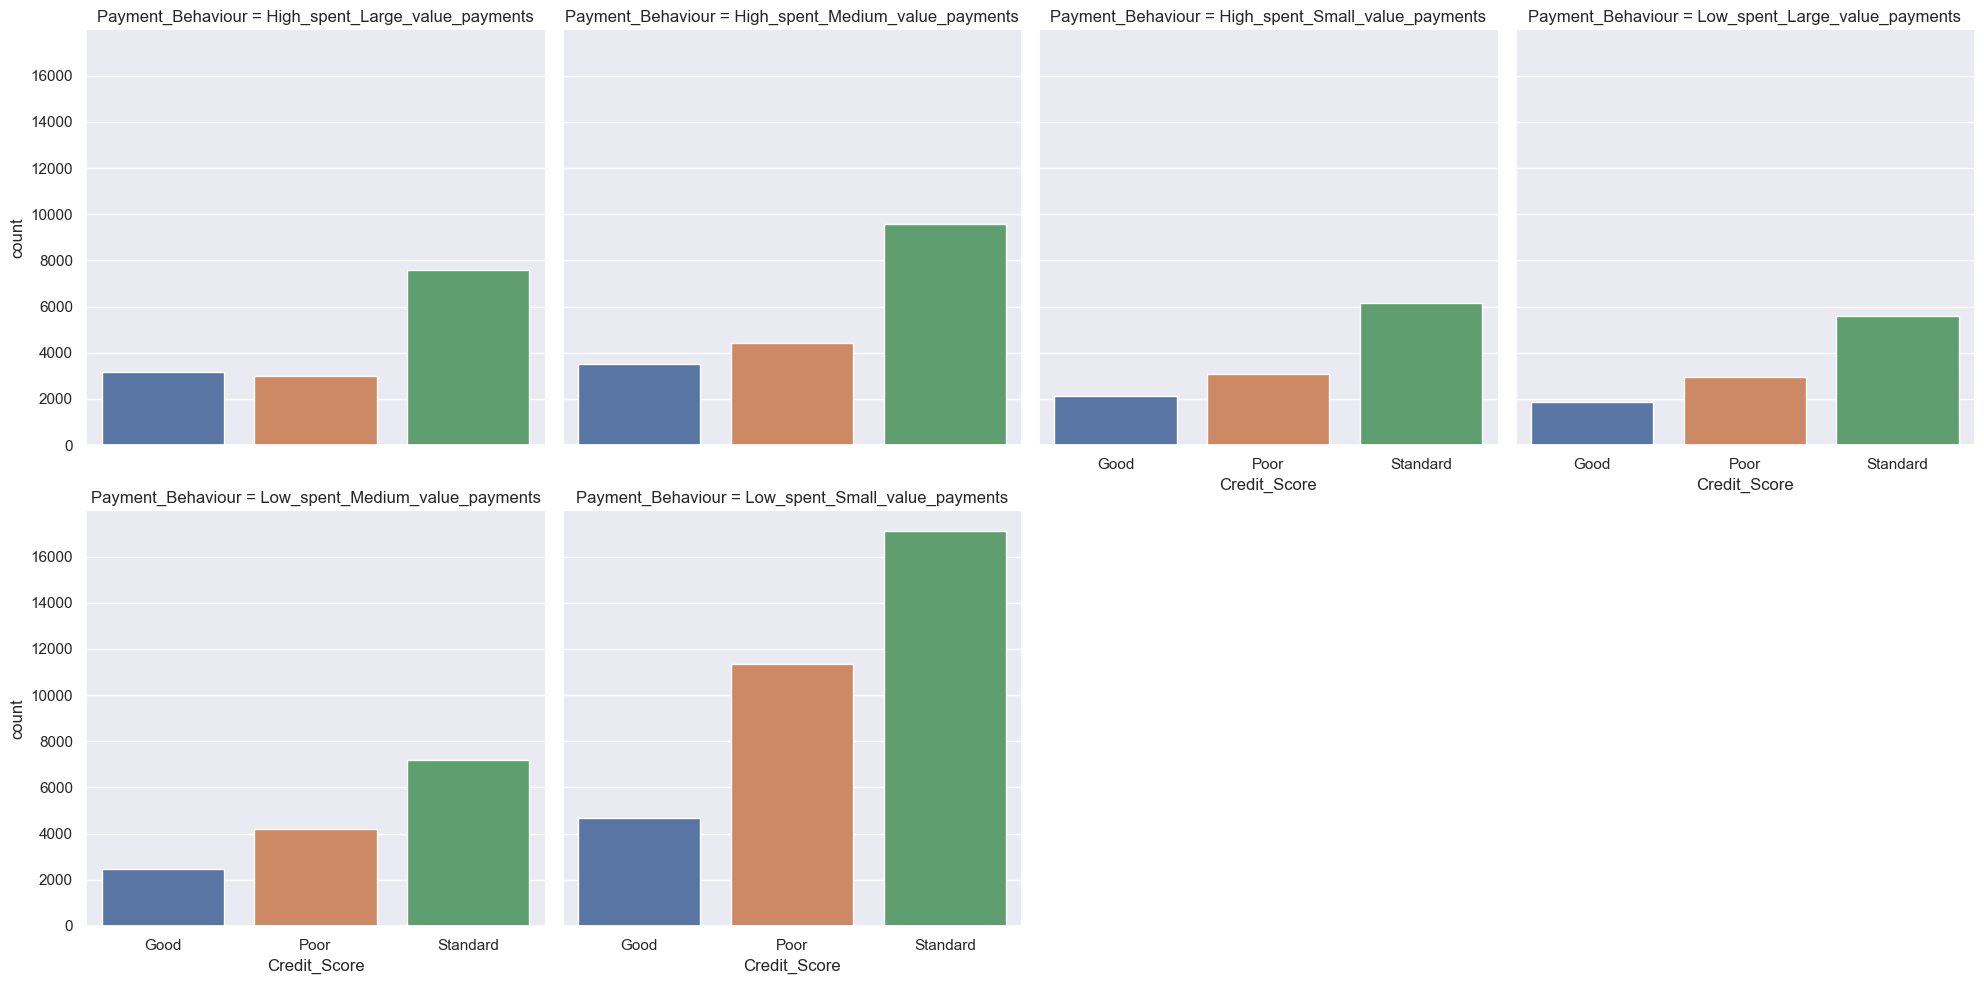

In [147]:
plot_categorical(col=df_clean_train['Payment_Behaviour'],data= df_clean_train,target=df_clean_train['Credit_Score'])

In [165]:
df_clean_train.select_dtypes(include='number').describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.320330,1.764157e+05,4197.393268,17.091280,22.47443,72.466040,7.022880,21.090005,29.708865,10.471988,27.333180,1426.220376,32.285173,18.381758,1403.118217,616.883308,403.566617
std,10.773754,1.429618e+06,3186.540184,117.404834,129.05741,466.422621,59.140535,14.829403,218.024967,6.657899,191.293888,1155.129026,5.116875,8.310666,8306.041270,1999.467022,214.379874
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,0.007760
25%,24.000000,1.945750e+04,1626.594167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.370000,3.000000,566.072500,28.052567,12.100000,30.306660,75.428550,270.368677
50%,33.000000,3.757861e+04,3095.905000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,18.200000,69.249473,136.120046,337.368742
75%,42.000000,7.279092e+04,5957.715000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.850000,9.000000,1945.962500,36.496663,25.100000,161.224249,262.941794,472.098940
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,33.800000,82331.000000,10000.000000,1602.040519


Checking for Out Liers

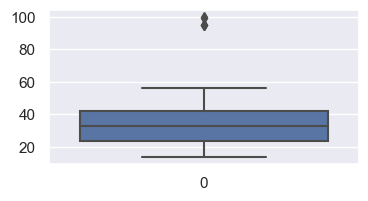

********************************************


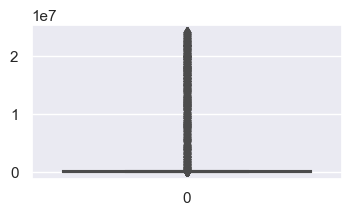

********************************************


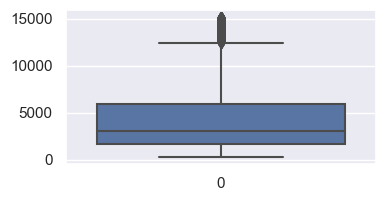

********************************************


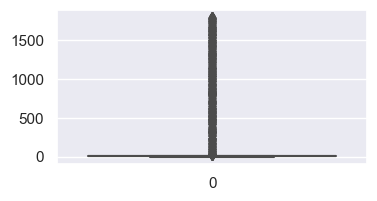

********************************************


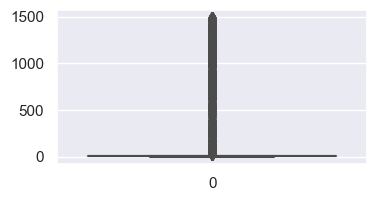

********************************************


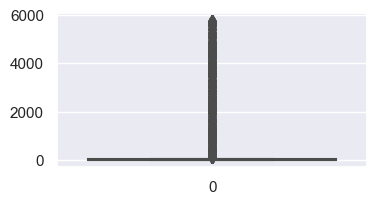

********************************************


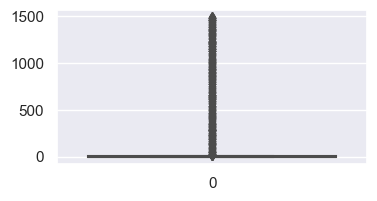

********************************************


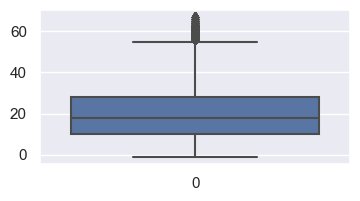

********************************************


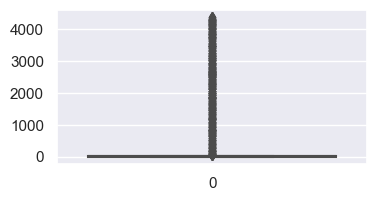

********************************************


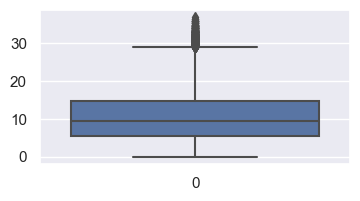

********************************************


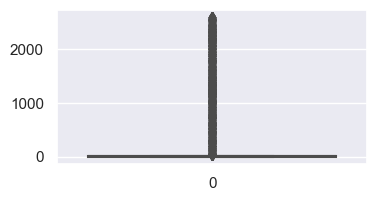

********************************************


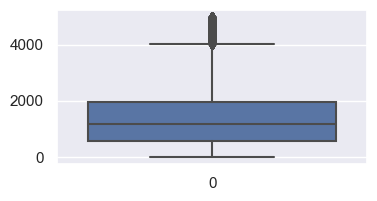

********************************************


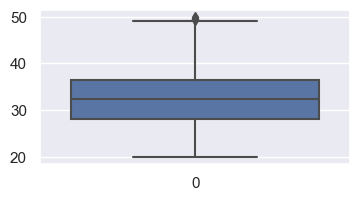

********************************************


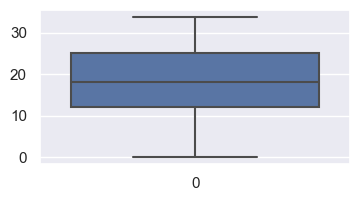

********************************************


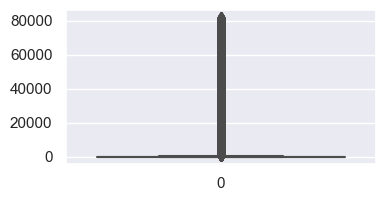

********************************************


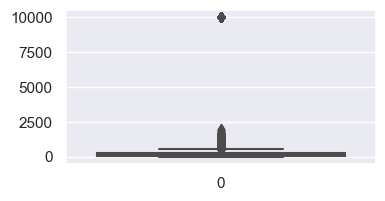

********************************************


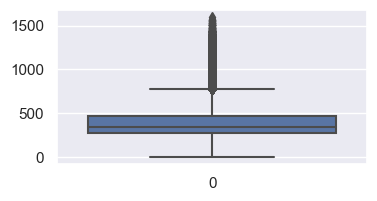

********************************************


In [162]:
for var in df_clean_train.select_dtypes(include='number').columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df_clean_train[var])
    plt.show()
    
    print('***********'*4)


Handling the outliers

In [166]:
# as observable there are multiple out liers in the numerical columns .
# lets Handle the outliers
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(df_clean_train.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(df_clean_train, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 2522 indices:  [54, 420, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 3015, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3577, 3688, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4650, 5288, 5289, 5290, 5291, 5292, 5293, 5294, 5295, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7472, 7473, 7474, 7475, 747

In [170]:
df_clean_train.shape

(100000, 28)

In [171]:
df_clean_train = df_clean_train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

In [172]:
df_clean_train.shape

(97478, 28)

Outliers dropped

In [173]:
df_clean_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97478.000000,9.747800e+04,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000
mean,33.281643,1.668699e+05,4004.650022,16.523144,21.582788,70.370699,6.809065,21.205908,28.702989,10.515673,26.137949,1429.017136,32.220351,18.303611,1351.522602,594.471307,393.947108
std,10.772937,1.387926e+06,2915.033327,114.358253,125.380962,458.754160,57.072615,14.742562,210.508552,6.632988,186.042213,1148.649374,5.083067,8.295555,8150.753554,1966.814662,197.998254
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,0.007760
25%,24.000000,1.926717e+04,1615.541667,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.420000,3.000000,570.510000,28.003119,11.900000,29.984301,74.309792,269.760327
50%,33.000000,3.665469e+04,3032.714167,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,9.450000,6.000000,1174.480000,32.242551,18.110000,67.760350,133.060475,335.102173
75%,42.000000,7.042178e+04,5778.820000,8.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.960000,9.000000,1960.420000,36.437339,25.000000,155.077614,252.194648,462.813017
max,100.000000,2.419806e+07,14880.383333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,48.337291,33.800000,82331.000000,10000.000000,1415.564984


 Numerical variable - Monthly_Inhand_Salary

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

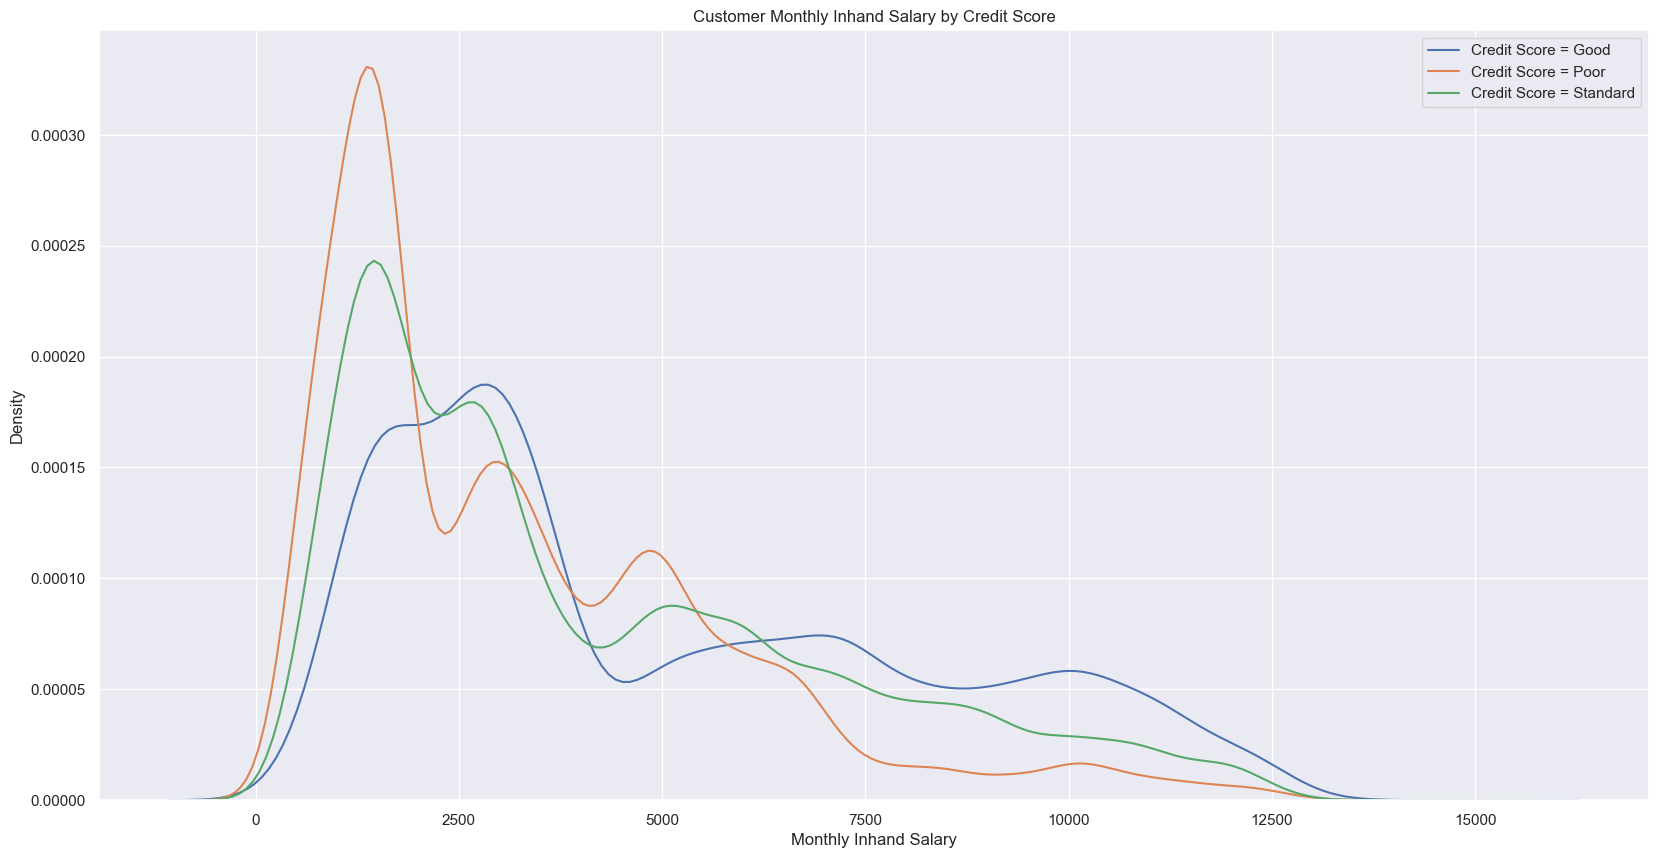

In [176]:

sns.kdeplot(df_clean_train['Monthly_Inhand_Salary'][df_clean_train['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df_clean_train['Monthly_Inhand_Salary'][df_clean_train['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df_clean_train['Monthly_Inhand_Salary'][df_clean_train['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary than compared to the customer's who have a Standard and a Good credit score.

Numerical variable - Outstanding_Debt

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

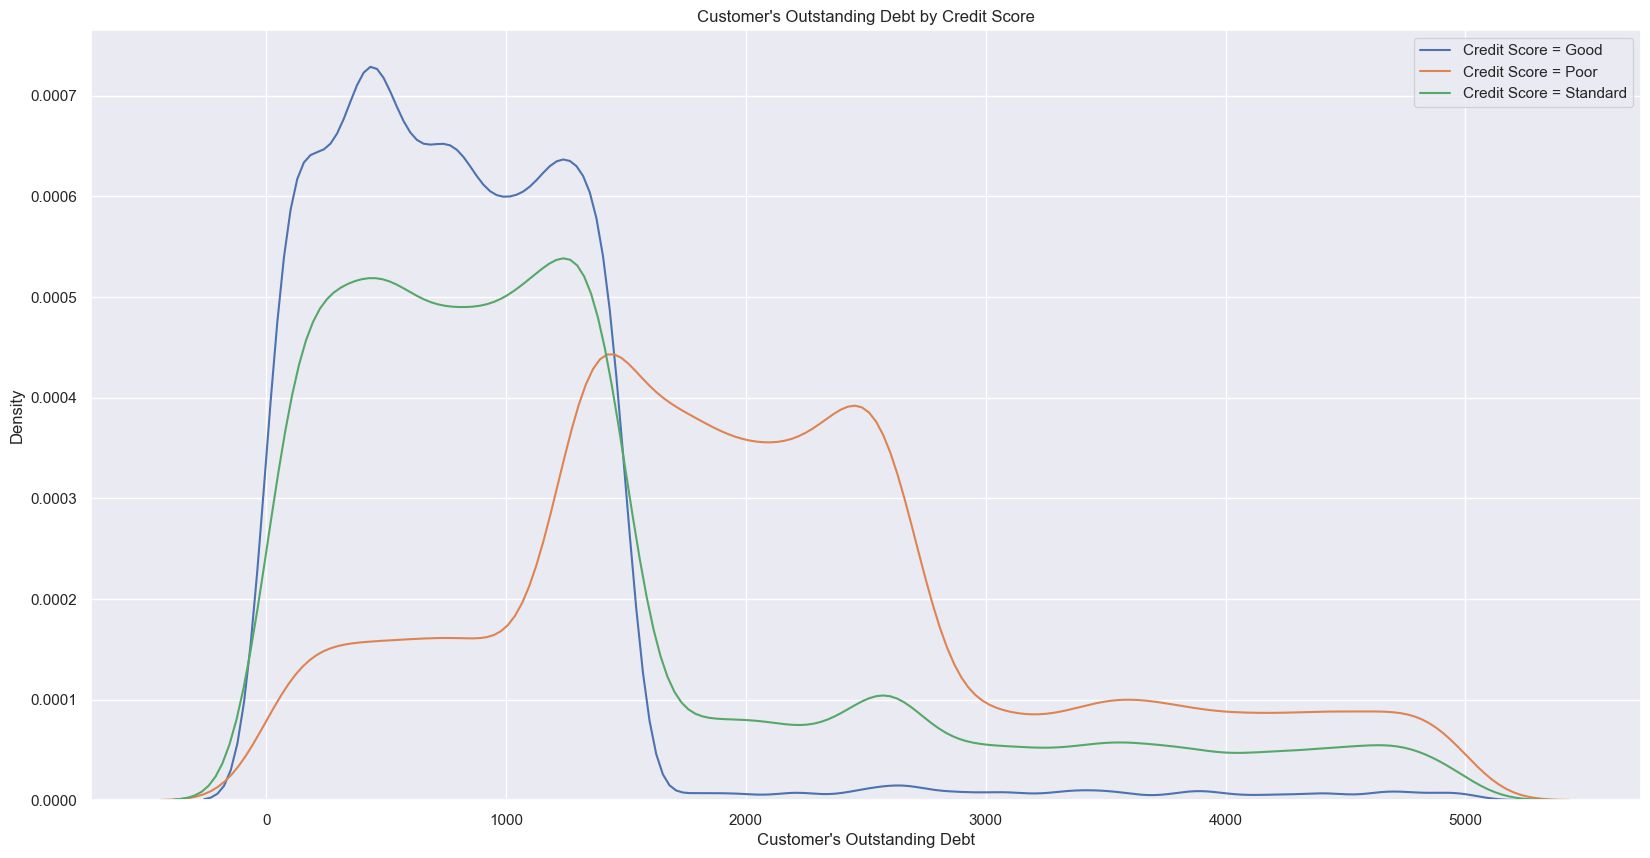

In [159]:

sns.kdeplot(df_clean_train['Outstanding_Debt'][df_clean_train['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df_clean_train['Outstanding_Debt'][df_clean_train['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df_clean_train['Outstanding_Debt'][df_clean_train['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

From the above graph, we can see that customer's who have a Good credit score have very low outstanding debt than compared to the customer's who have Standard and Poor credit score.

Bivariate Analysis:

In [193]:
correlation_matrix = df_clean_train.select_dtypes(include='number').corr()
correlation_matrix

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.006822,0.087624,-0.001528,-0.006656,-0.002443,-0.011664,-0.173444,0.001355,-0.156199,-0.006269,-0.204082,0.024098,0.235733,0.000013,0.004959,0.119021
Annual_Income,0.006822,1.000000,0.026607,-0.004396,-0.000652,-0.004390,-0.003903,-0.010788,-0.001309,0.000856,-0.006135,-0.006622,0.008769,0.000946,-0.003765,-0.007801,0.017862
Monthly_Inhand_Salary,0.087624,0.026607,1.000000,-0.013096,-0.008519,-0.004292,-0.017018,-0.226590,-0.002127,-0.154915,-0.013362,-0.261298,0.154670,0.255245,0.004501,0.053331,0.685981
Num_Bank_Accounts,-0.001528,-0.004396,-0.013096,1.000000,-0.005726,-0.003877,-0.001920,0.014208,-0.005226,0.006658,-0.004117,0.013441,-0.003302,-0.011786,-0.004219,-0.003893,-0.011326
Num_Credit_Card,-0.006656,-0.000652,-0.008519,-0.005726,1.000000,-0.007581,-0.004004,0.003397,0.000559,0.001719,-0.006249,0.000126,-0.002739,-0.002162,-0.005427,-0.006473,-0.007334
Interest_Rate,-0.002443,-0.004390,-0.004292,-0.003877,-0.007581,1.000000,-0.002302,0.004948,-0.003261,-0.002556,-0.004452,0.005230,-0.000290,-0.007002,-0.002289,-0.006696,-0.006116
Num_of_Loan,-0.011664,-0.003903,-0.017018,-0.001920,-0.004004,-0.002302,1.000000,0.013896,0.003847,0.014928,-0.000449,0.023575,-0.005536,-0.022578,-0.000360,-0.002811,-0.022177
Delay_from_due_date,-0.173444,-0.010788,-0.226590,0.014208,0.003397,0.004948,0.013896,1.000000,0.012631,0.284932,0.010021,0.564064,-0.054691,-0.484244,-0.007322,-0.016517,-0.267296
Num_of_Delayed_Payment,0.001355,-0.001309,-0.002127,-0.005226,0.000559,-0.003261,0.003847,0.012631,1.000000,0.005432,-0.000068,0.008708,0.001482,-0.008850,-0.003775,-0.004476,-0.004135
Changed_Credit_Limit,-0.156199,0.000856,-0.154915,0.006658,0.001719,-0.002556,0.014928,0.284932,0.005432,1.000000,0.004152,0.456357,-0.041032,-0.423815,-0.004065,-0.012782,-0.194043


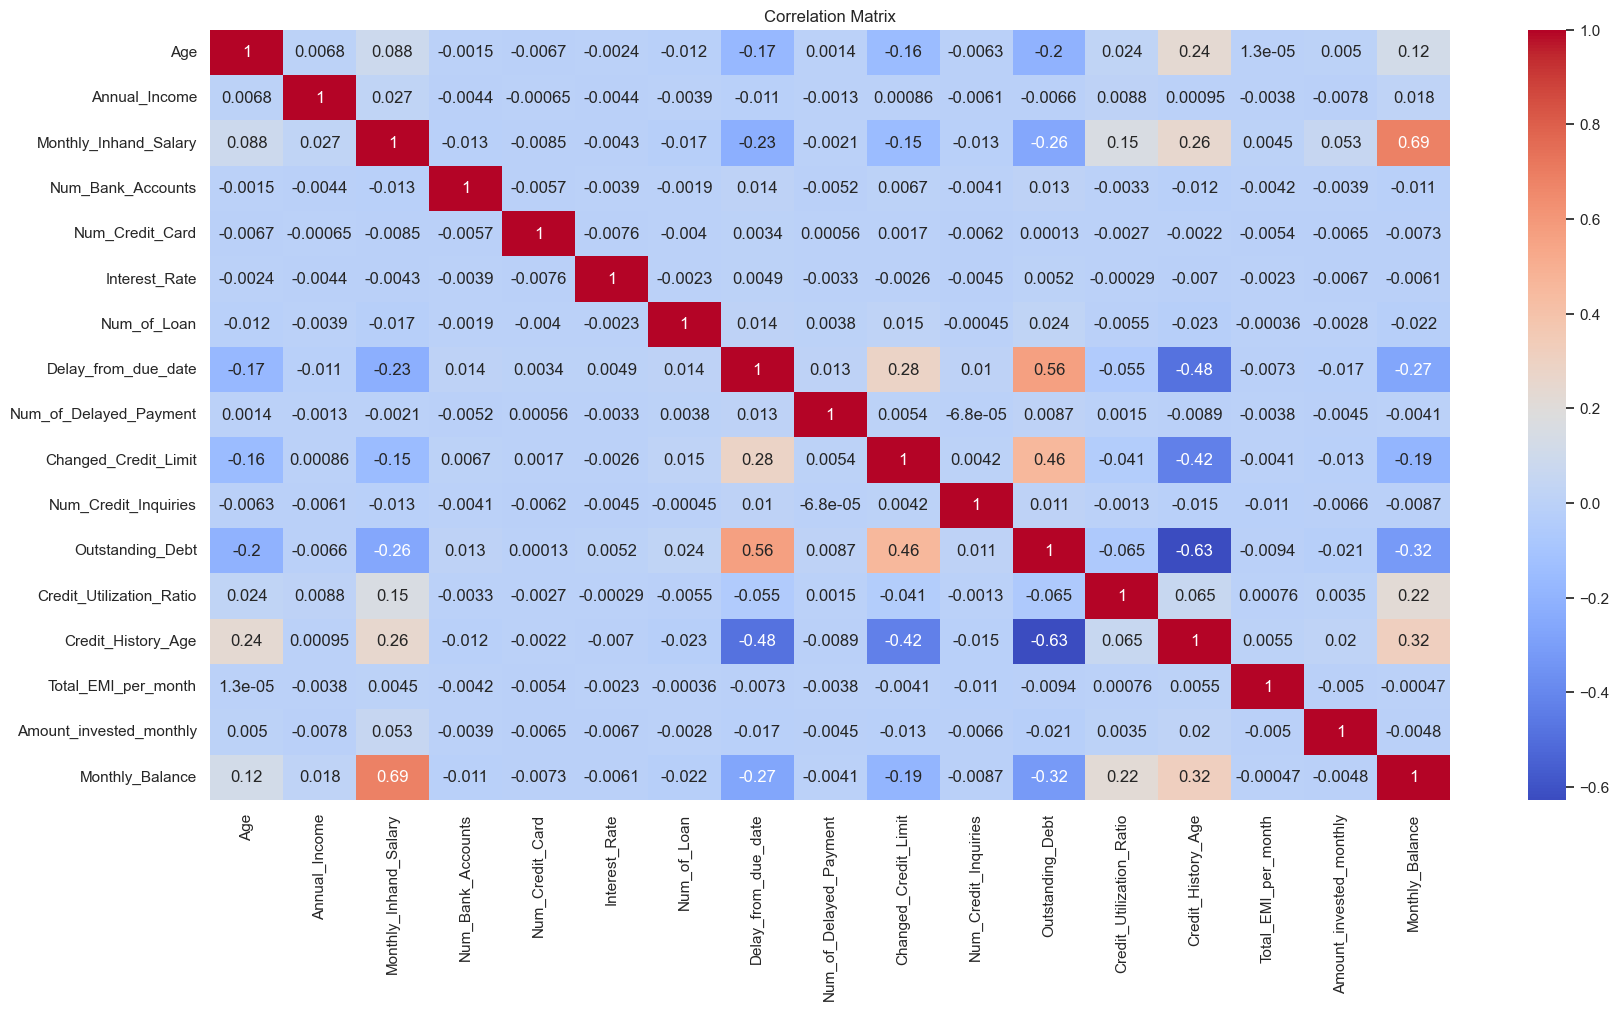

In [194]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Multivariate Analysis:

In [ ]:
sns.pairplot(df_clean_train.select_dtypes(include='number'))
plt.title('Pair Plot for Numerical Variables')
plt.show()

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

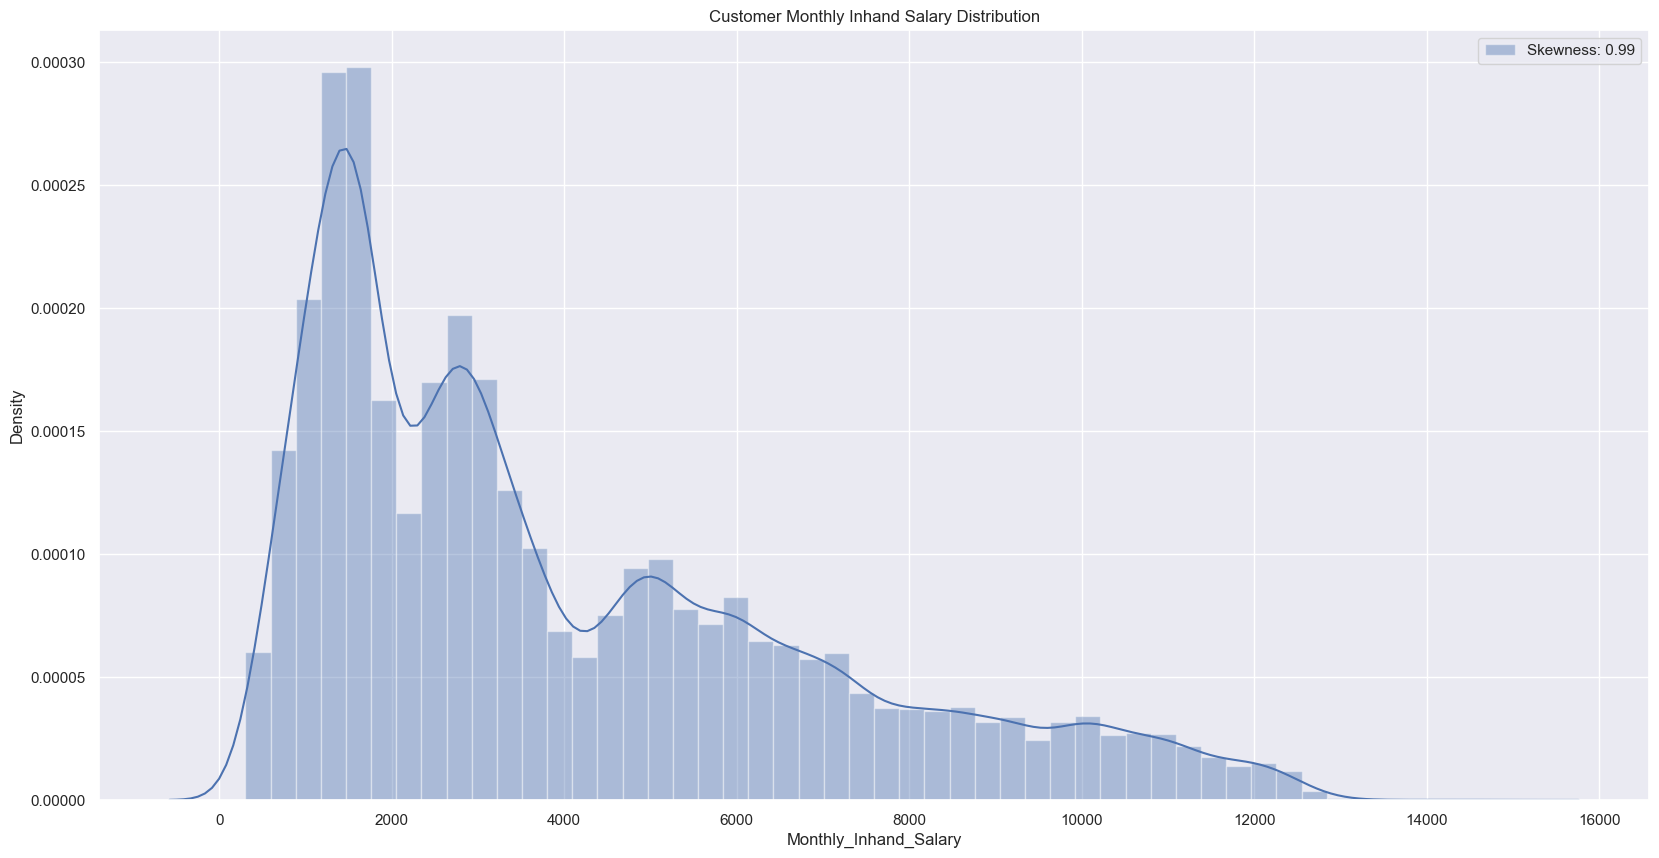

In [195]:
# lets check the distribution of Monthly_Inhand_Salary
sns.distplot(df_clean_train['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df_clean_train['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

The Monthly in hand salary is highly skewed lets check for the normality.

In [178]:
import scipy.stats as stats

In [180]:

# Check for normality using the Shapiro-Wilk test
stat, p_value = stats.shapiro(df_clean_train['Monthly_Inhand_Salary'])
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")


Data is not normally distributed


Data is not normal lets go for Kruskal-Wallis test to check for significant difference.

In [182]:
stat, p_value = stats.kruskal(df_clean_train['Monthly_Inhand_Salary'][df_clean_train['Credit_Score'] == 'Good'],
                              df_clean_train['Monthly_Inhand_Salary'][df_clean_train['Credit_Score'] == 'Standard'],
                              df_clean_train['Monthly_Inhand_Salary'][df_clean_train['Credit_Score'] == 'Poor'])
if p_value < 0.05:
    print("Reject the null hypothesis: Annual income differs across target variables")
else:
    print("Fail to reject the null hypothesis: No significant difference in annual income")

Reject the null hypothesis: Annual income differs across target variables


There is relation B/W Monthly_Inhand_Salary and the Credit_Score

Checking if there is an independence of the Occupation and Credit Score.

In [183]:
contingency_table = pd.crosstab(df_clean_train['Occupation'], df_clean_train['Credit_Score'])
contingency_table

Credit_Score,Good,Poor,Standard
Occupation,,,
Accountant,1115,2003,3422
Architect,1154,1836,3655
Developer,1125,1904,3516
Doctor,1119,1766,3543
Engineer,1204,2046,3434
Entrepreneur,1123,1990,3359
Journalist,1185,1809,3391
Lawyer,1208,1924,3786
Manager,1152,1800,3282


In [184]:
# Perform the Chi-Square test
stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: Occupation and Credit Score are dependent")
else:
    print("Fail to reject the null hypothesis: No significant dependence between Occupation and Credit Score")

Reject the null hypothesis: Occupation and Credit Score are dependent


From Above test we can say that Occupation and Credit Score are dependent

In [245]:
contingency_table_2 = pd.crosstab(df_clean_train['Payment_Behaviour'], df_clean_train['Credit_Score'])
contingency_table_2

Credit_Score,Good,Poor,Standard
Payment_Behaviour,,,
High_spent_Large_value_payments,2920,2858,7299
High_spent_Medium_value_payments,3381,4344,9391
High_spent_Small_value_payments,2020,3048,6046
Low_spent_Large_value_payments,1796,2897,5512
Low_spent_Medium_value_payments,2299,4113,6968
Low_spent_Small_value_payments,4466,11209,16911


Checking if there is a relationship between the Payment Behaviour and Credit Score.

In [249]:
# as data is not normal
stat, p_value,dof, expected = stats.chi2_contingency(contingency_table_2)
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation ")
else:
    print("No significant correlation ")

Reject the null hypothesis: Significant correlation 


checking if the Credit_Utilization_Ratio median values are significantly not different across the target variable classes. 

In [250]:
stat, p_value,med,table = stats.median_test(df_clean_train['Credit_Utilization_Ratio'][df_clean_train['Credit_Score'] == 'Good'],
                              df_clean_train['Credit_Utilization_Ratio'][df_clean_train['Credit_Score'] == 'Standard'],
                              df_clean_train['Credit_Utilization_Ratio'][df_clean_train['Credit_Score'] == 'Poor'])
if p_value < 0.05:
    print("Reject the null hypothesis: Credit Utilization Ratio median values are different across target classes")
else:
    print("Fail to reject the null hypothesis: No significant difference in medians of Credit Utilization Ratio")


Reject the null hypothesis: Credit Utilization Ratio median values are different across target classes


Handling skewness of various features.

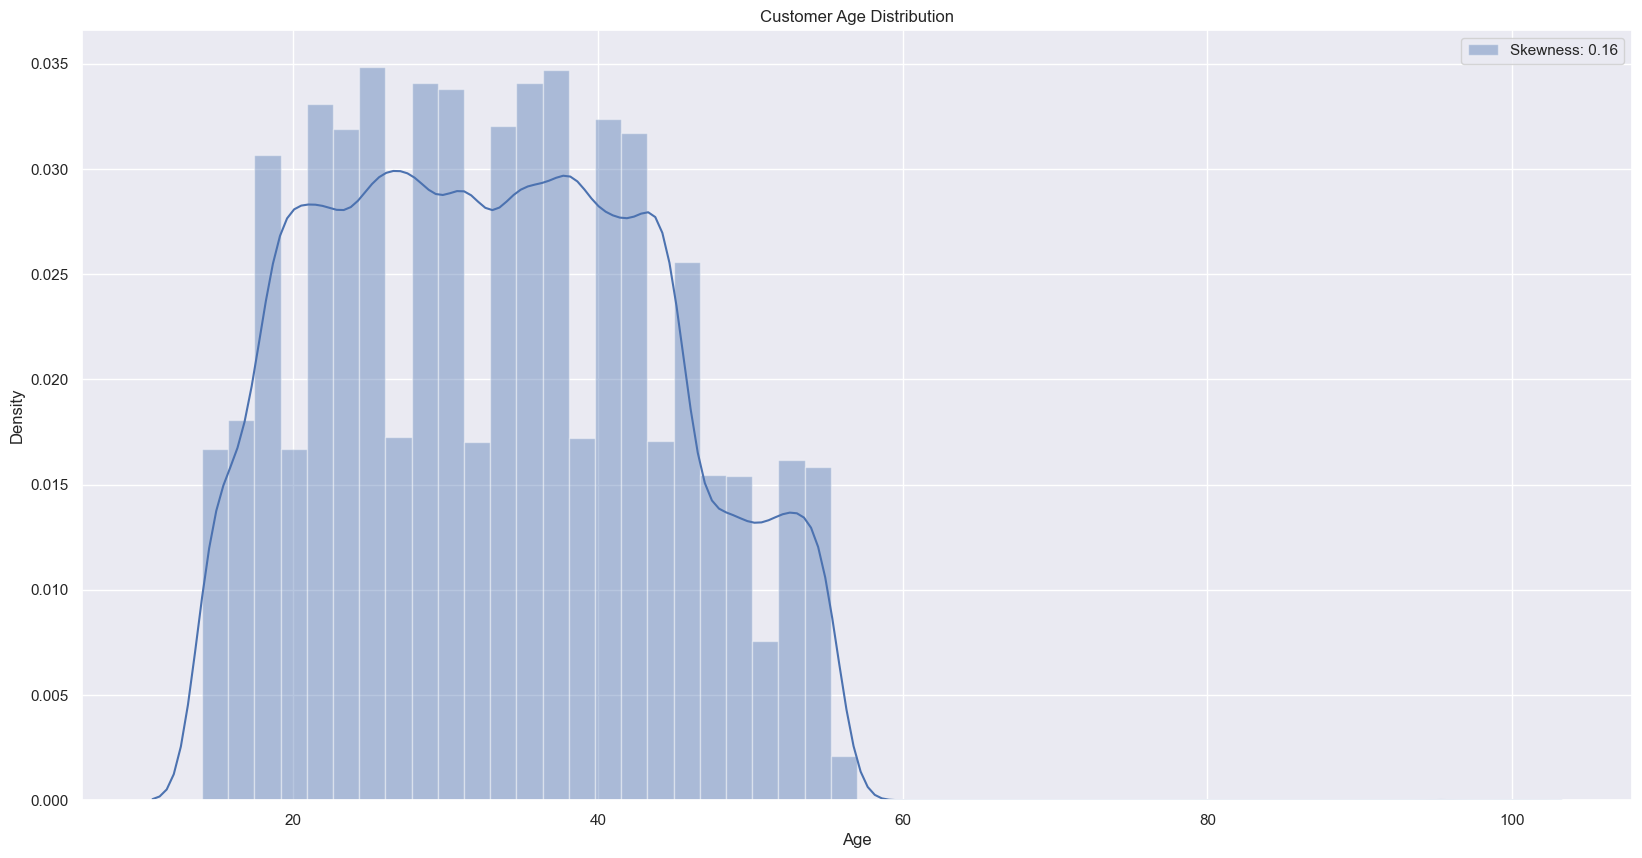

In [209]:
sns.distplot(df_clean_train['Age'], label = 'Skewness: %.2f'%(df_clean_train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')
plt.show()


Skewness is okay for Age column

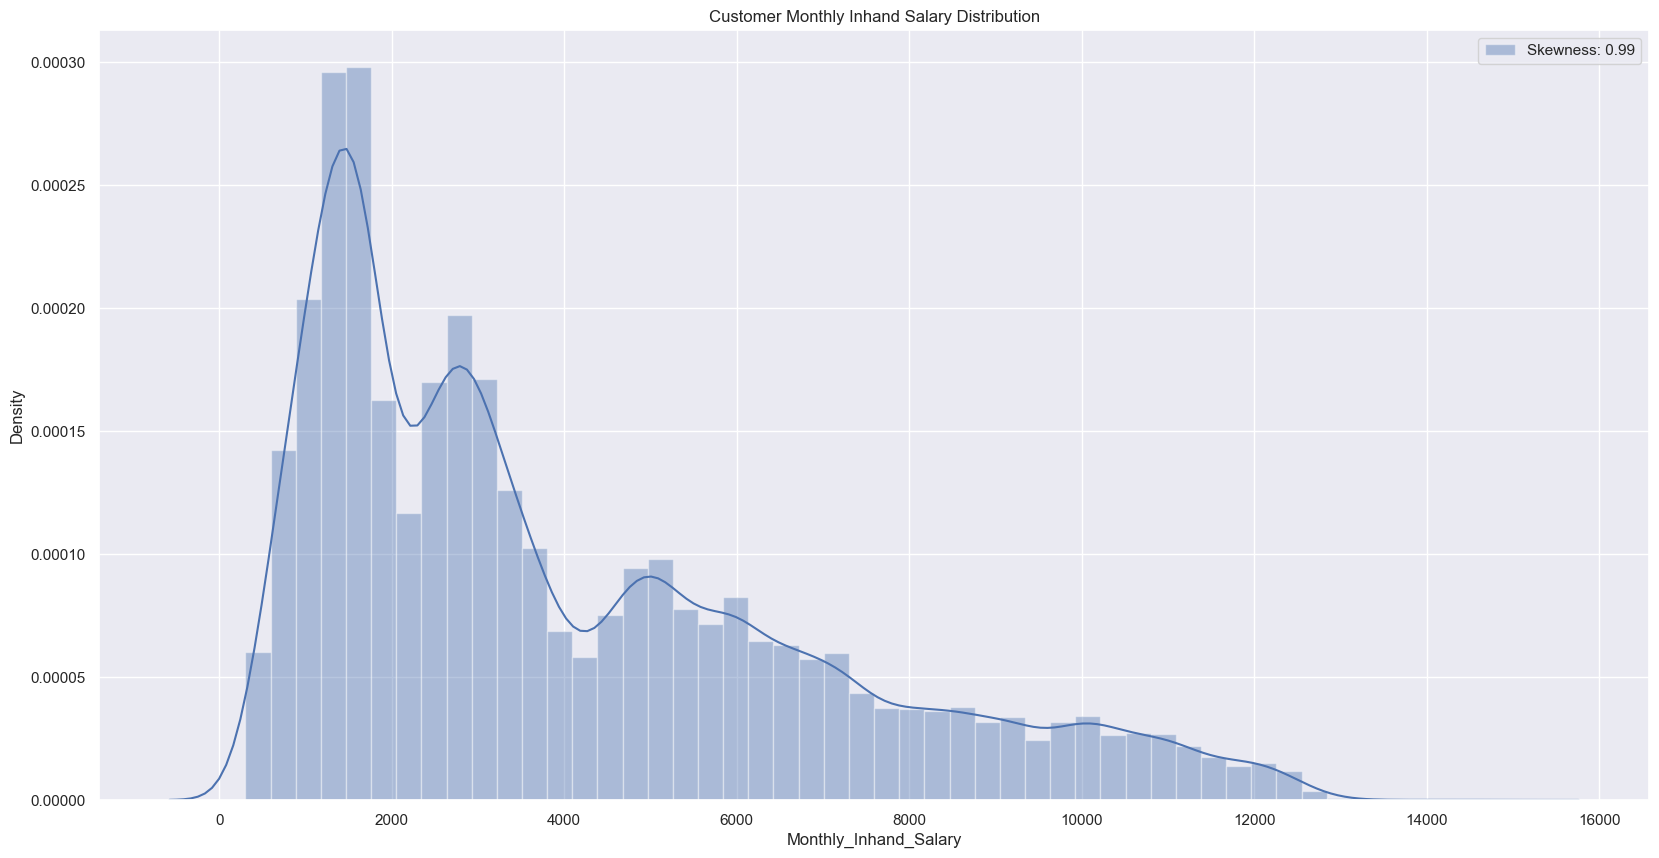

In [212]:
sns.distplot(df_clean_train['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df_clean_train['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')
plt.show()

Applying log transformation

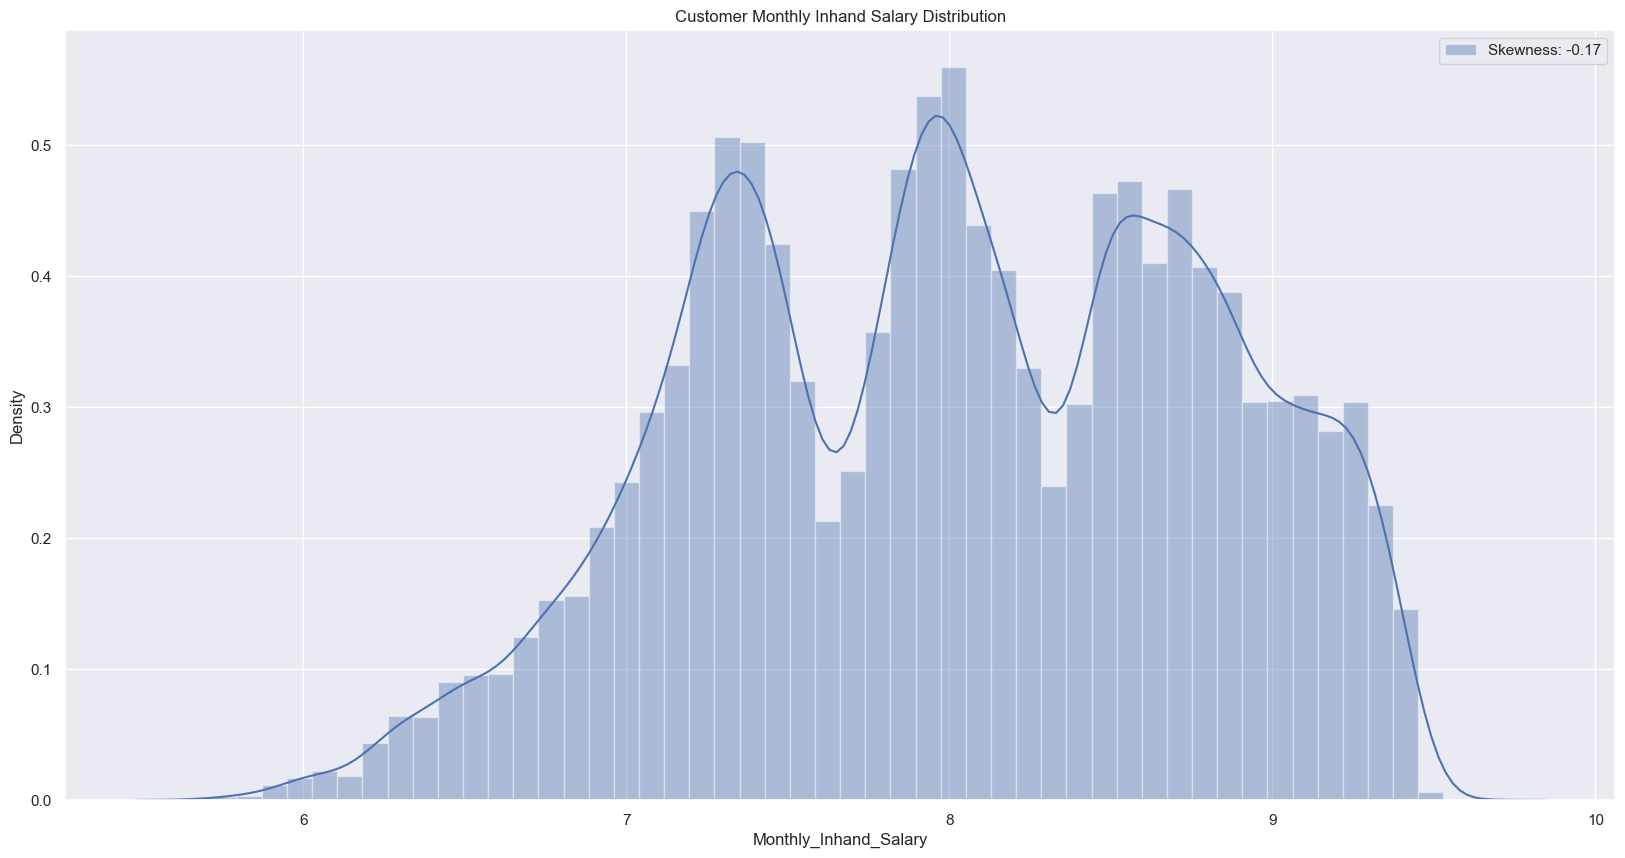

In [213]:
modified_salary = [np.log(salary) if salary > 0 else 0 for salary in df_clean_train['Monthly_Inhand_Salary']]
df_clean_train['Monthly_Inhand_Salary'] = modified_salary

sns.distplot(df_clean_train['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df_clean_train['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')
plt.show()

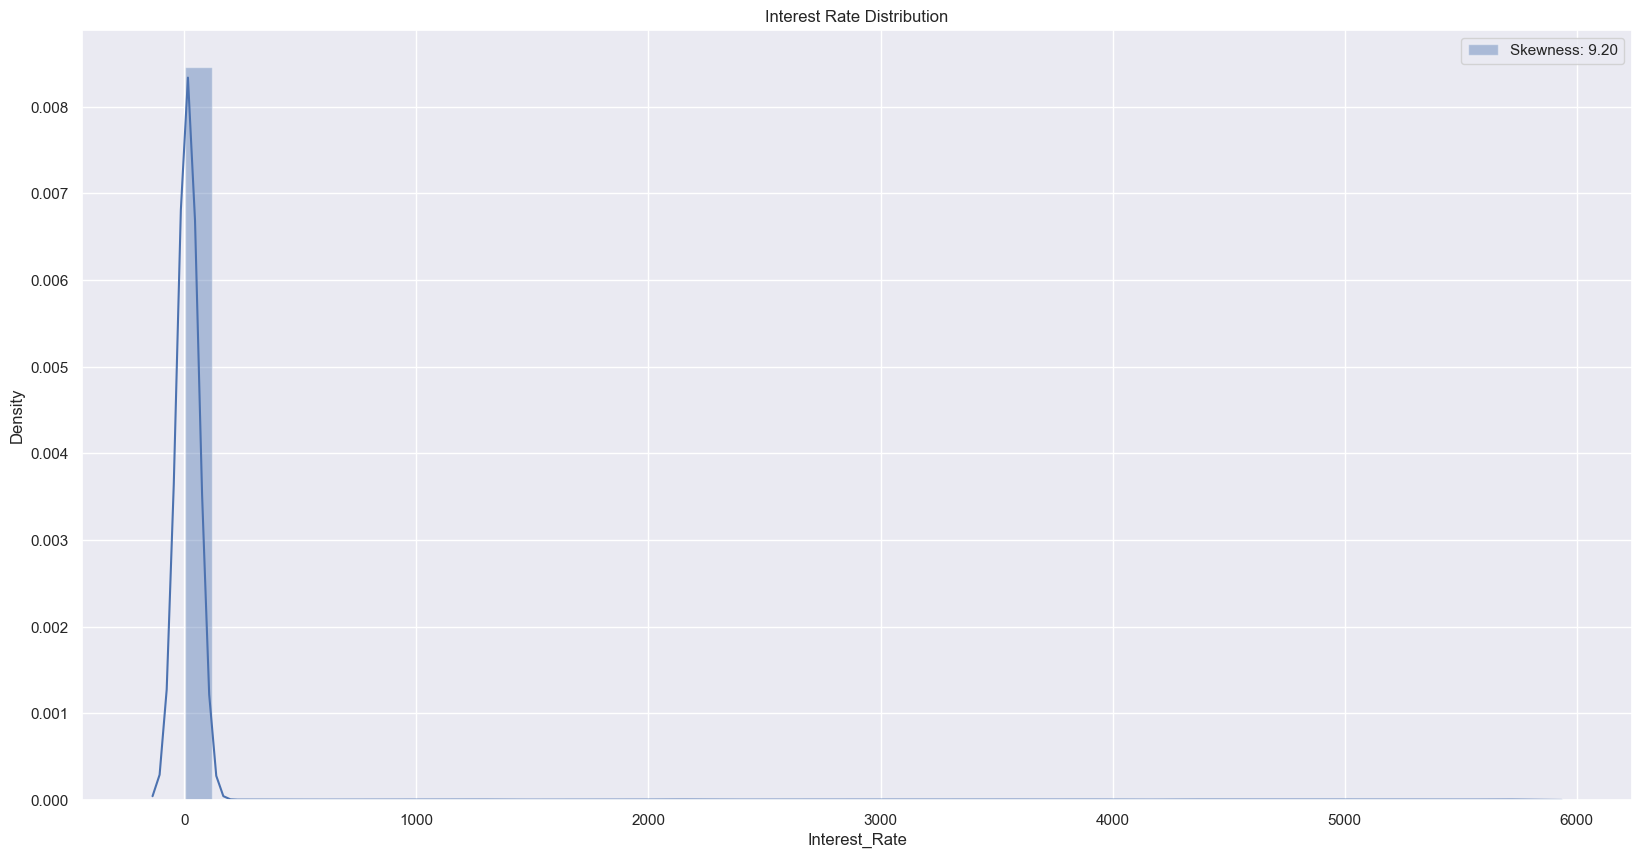

In [215]:
sns.distplot(df_clean_train['Interest_Rate'], label = 'Skewness: %.2f'%(df_clean_train['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')
plt.show()

Applying log transformation

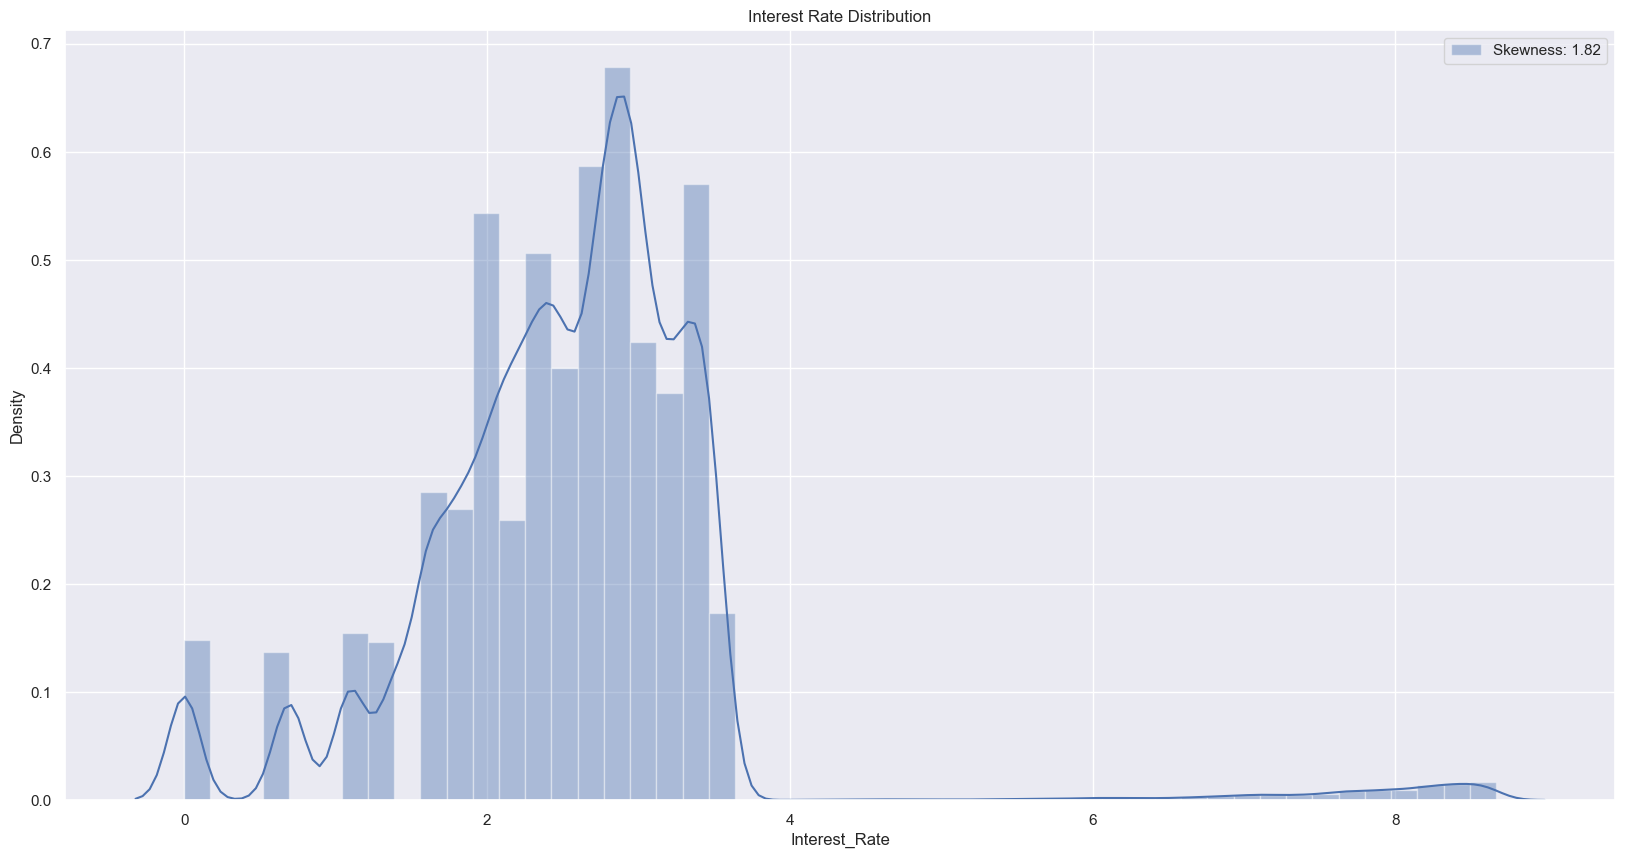

In [216]:
modified_interest = [np.log(interest) if interest > 0 else 0 for interest in df_clean_train['Interest_Rate']]
df_clean_train['Interest_Rate'] = modified_interest

sns.distplot(df_clean_train['Interest_Rate'], label = 'Skewness: %.2f'%(df_clean_train['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')
plt.show()

Skewness is improved.

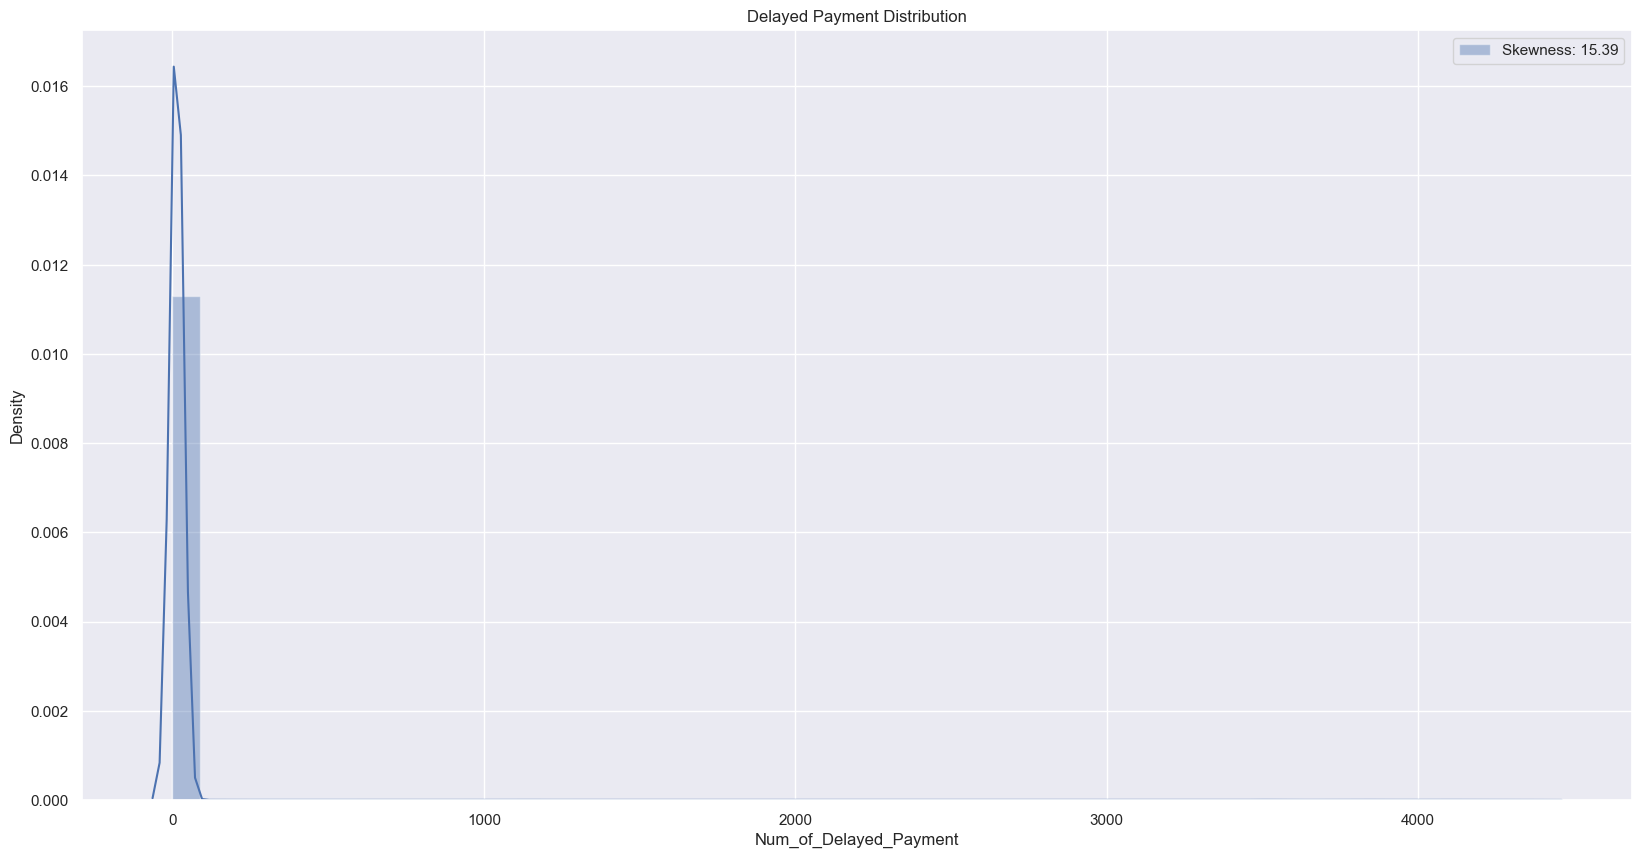

In [218]:
sns.distplot(df_clean_train['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df_clean_train['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')
plt.show()

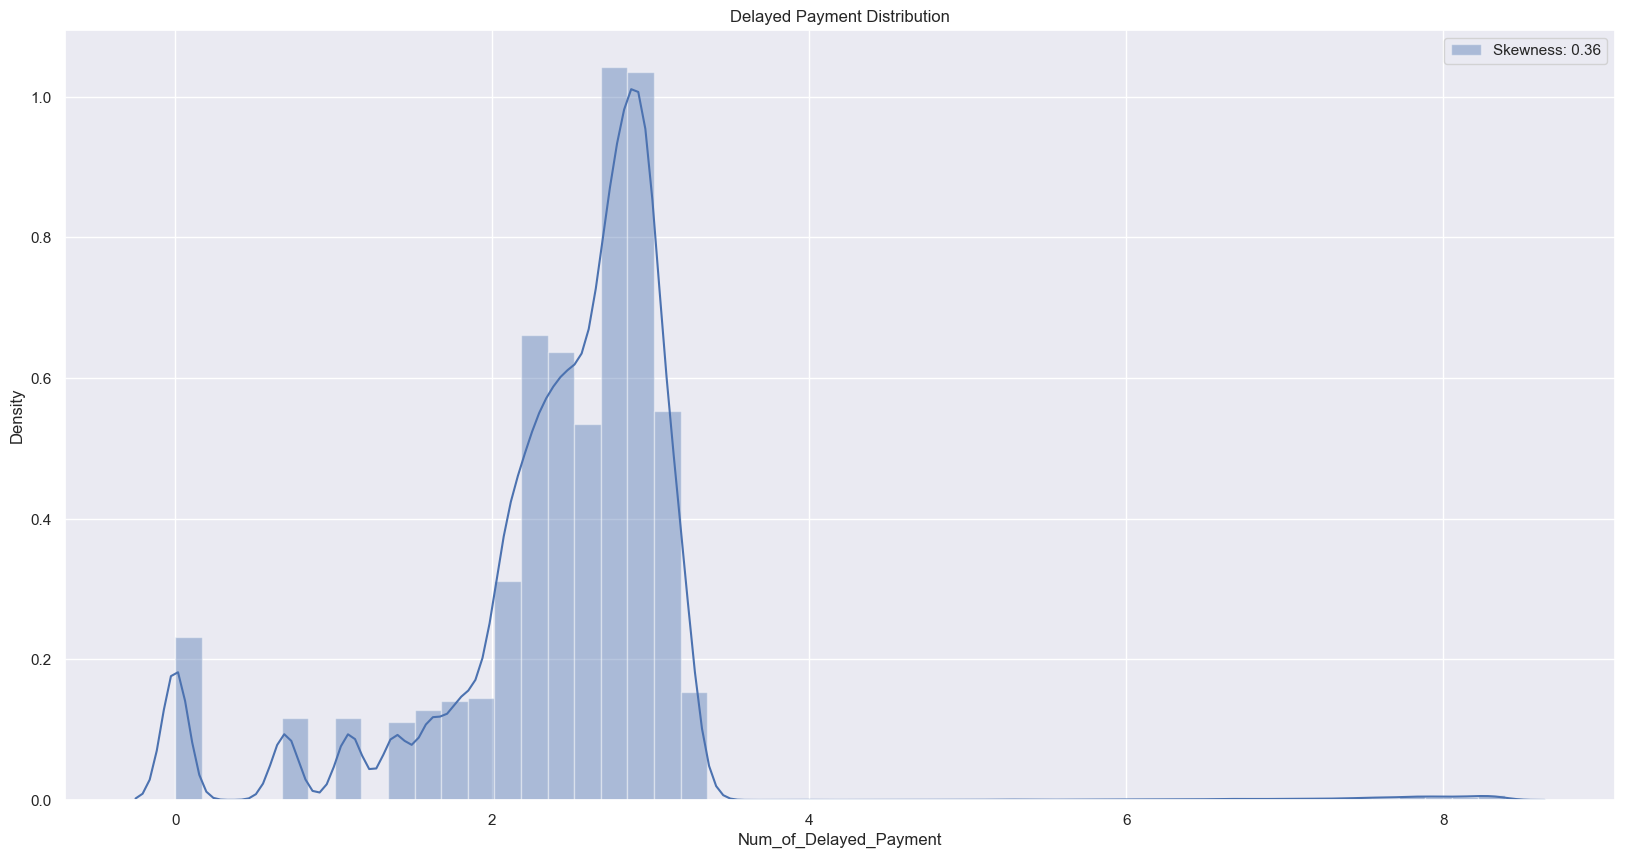

In [219]:
# log transforming 
modified_payment = [np.log(payment) if payment > 0 else 0 for payment in df_clean_train['Num_of_Delayed_Payment']]
df_clean_train['Num_of_Delayed_Payment'] = modified_payment

sns.distplot(df_clean_train['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df_clean_train['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')
plt.show()

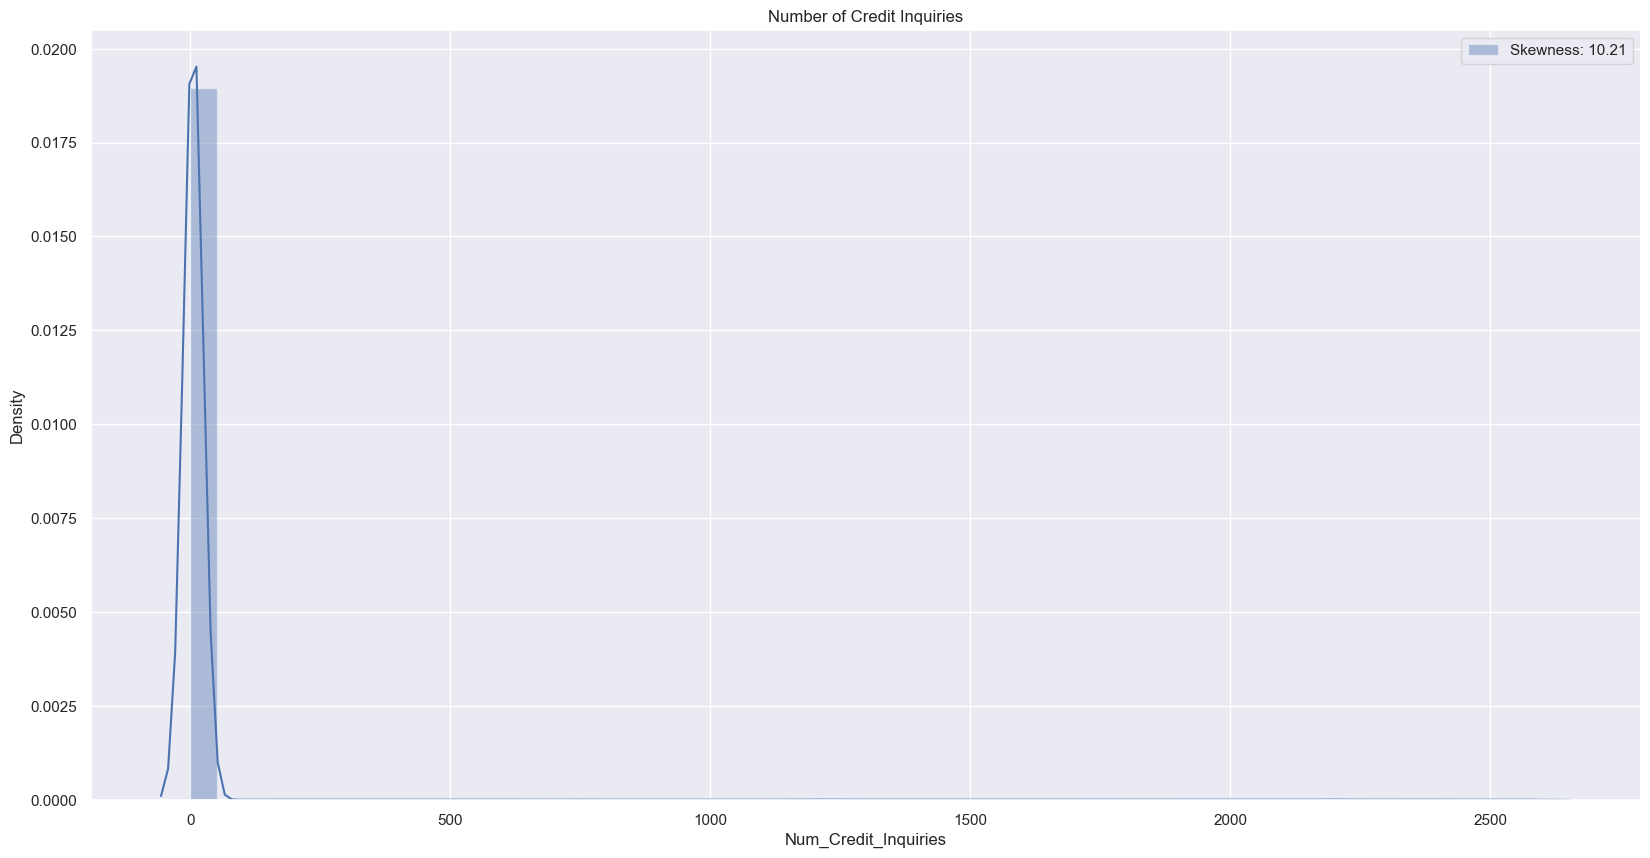

In [220]:
sns.distplot(df_clean_train['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df_clean_train['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Inquiries')
plt.show()

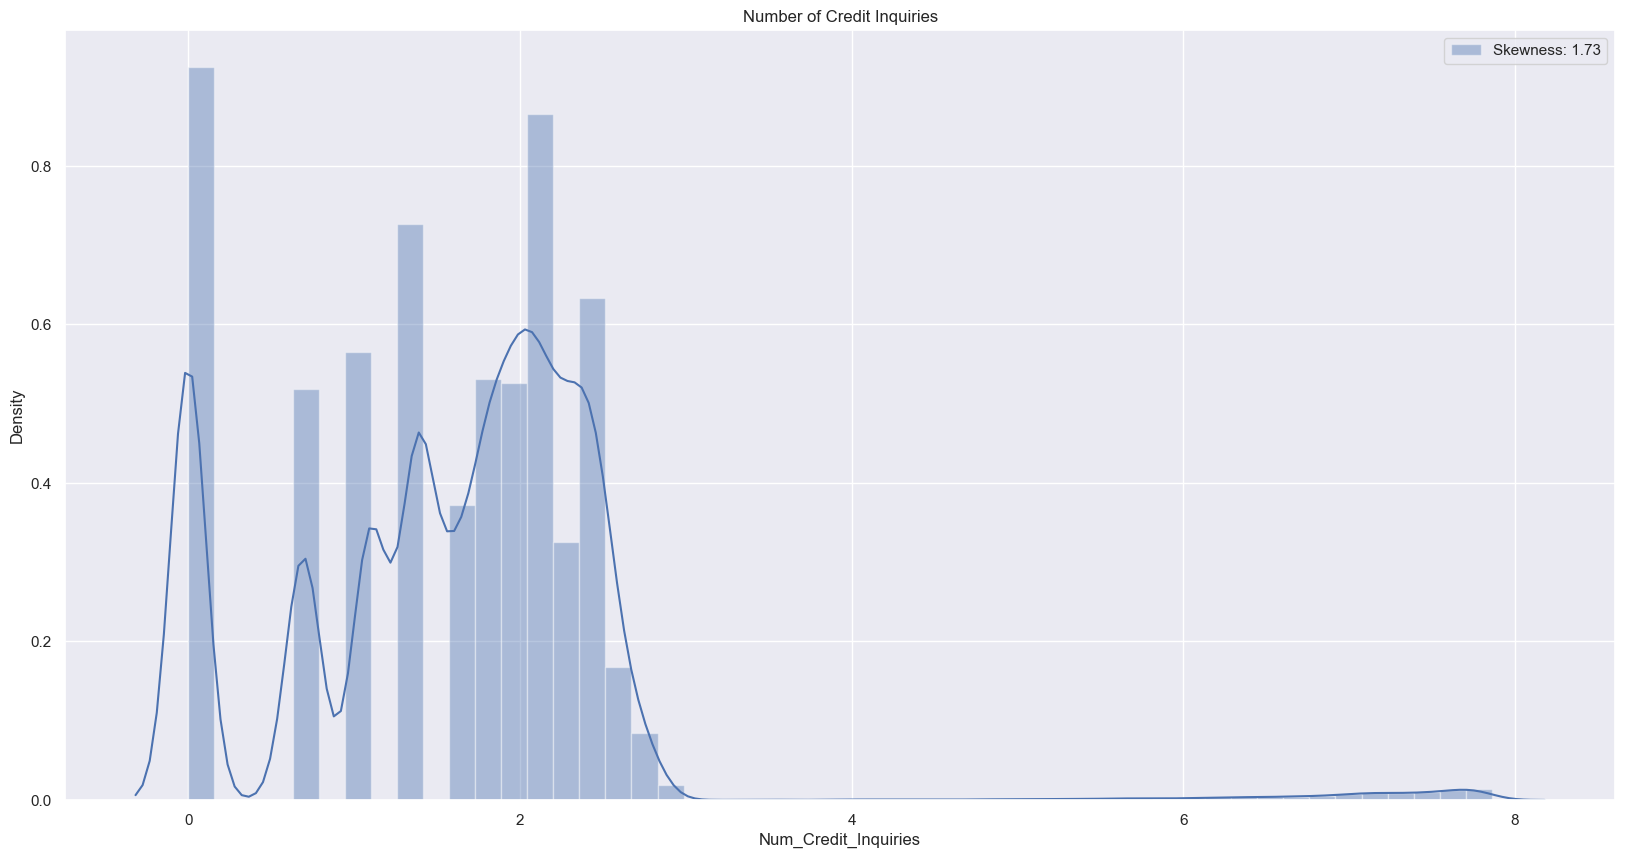

In [221]:
# log transforming for left skewed
modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in df_clean_train['Num_Credit_Inquiries']]
df_clean_train['Num_Credit_Inquiries'] = modified_inquiries

sns.distplot(df_clean_train['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df_clean_train['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Inquiries')
plt.show()

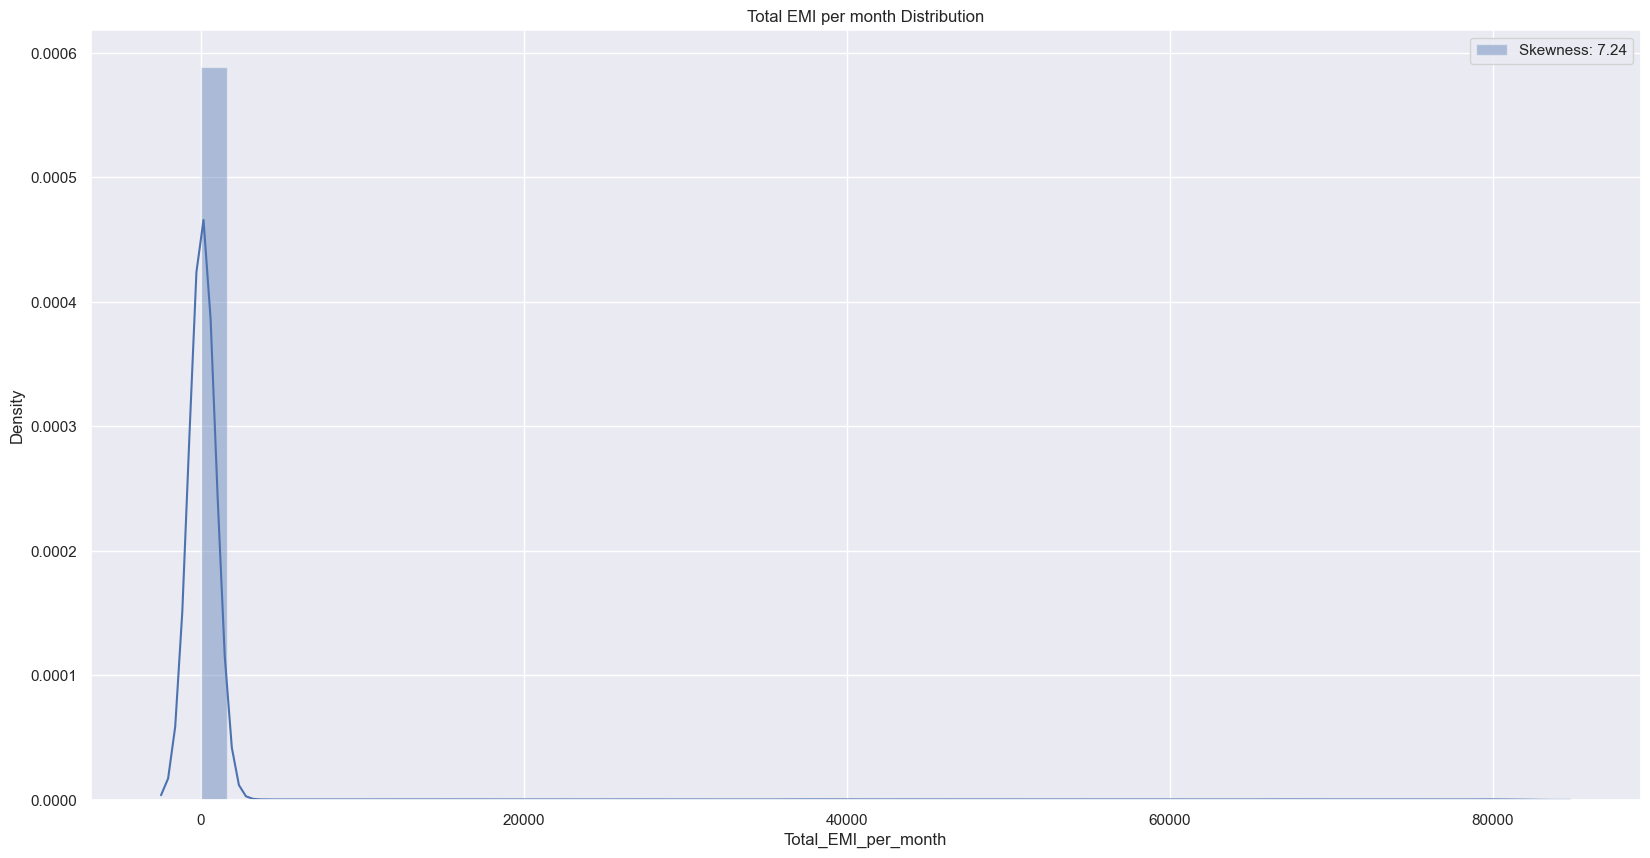

In [222]:
sns.distplot(df_clean_train['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df_clean_train['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')
plt.show()

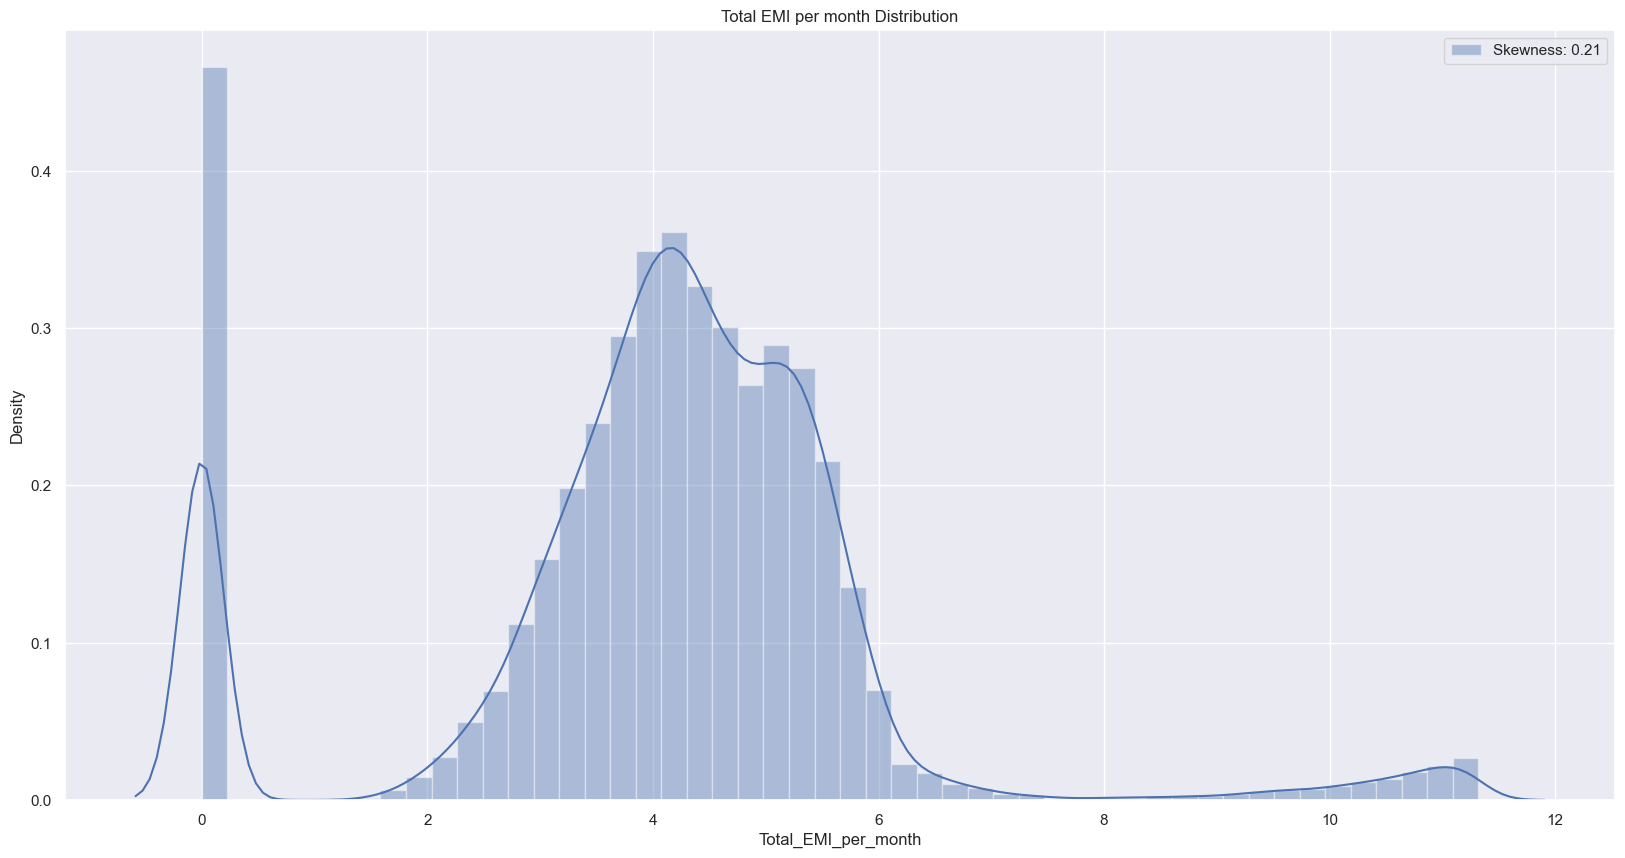

In [223]:
modified_emi = [np.log(emi) if emi > 0 else 0 for emi in df_clean_train['Total_EMI_per_month']]
df_clean_train['Total_EMI_per_month'] = modified_emi

sns.distplot(df_clean_train['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df_clean_train['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')
plt.show()

Skewness reduced greatly

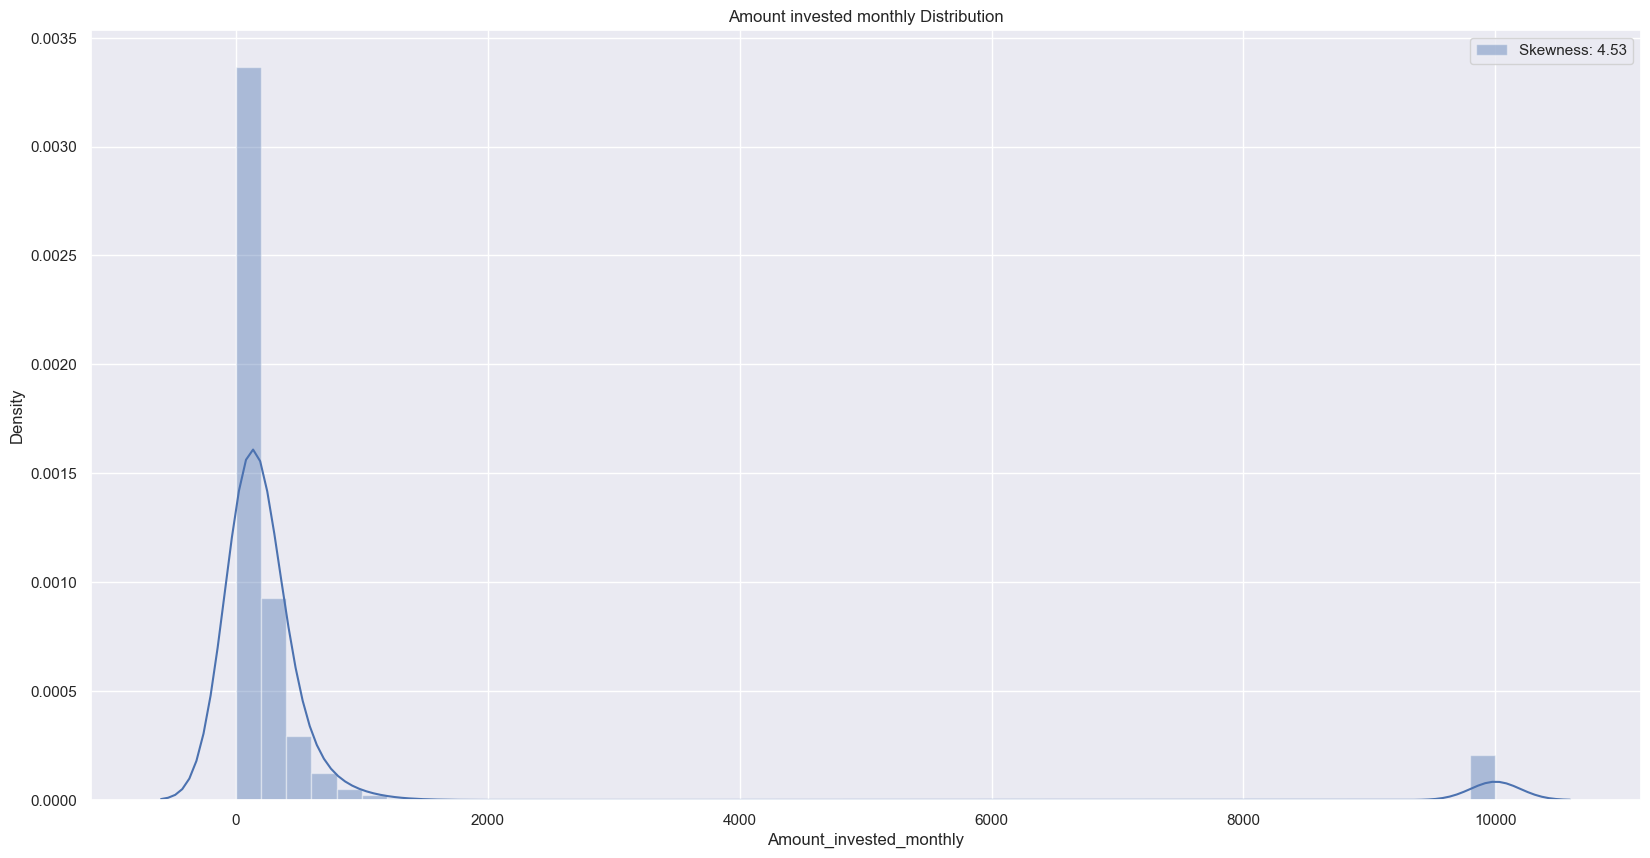

In [224]:
sns.distplot(df_clean_train['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df_clean_train['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')
plt.show()

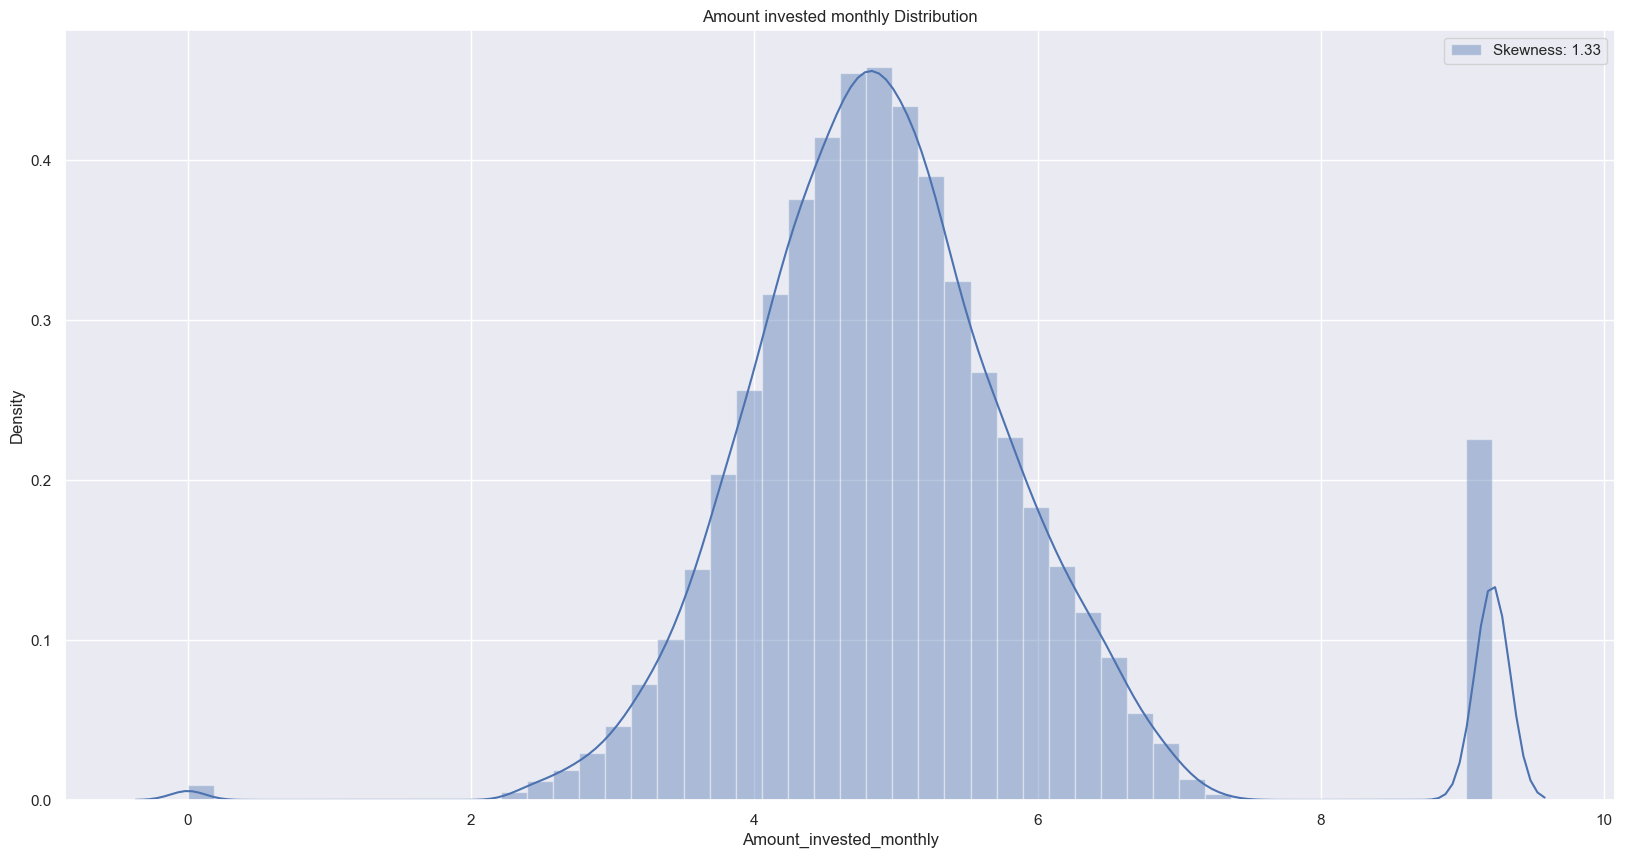

In [225]:
modified_amount = [np.log(amount) if amount > 0 else 0 for amount in df_clean_train['Amount_invested_monthly']]
df_clean_train['Amount_invested_monthly'] = modified_amount

sns.distplot(df_clean_train['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df_clean_train['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')
plt.show()

In [286]:
df_numeric_features = df_clean_train.select_dtypes(include=np.number)

df_numeric_features

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,7.509249,3.0,4.0,1.098612,4.0,3.0,1.945910,11.27,1.386294,809.98,26.822620,22.1,3.903486,4.387204,312.494089
1,23.0,19114.12,7.509249,3.0,4.0,1.098612,4.0,3.0,1.871802,11.27,1.386294,809.98,31.944960,22.5,3.903486,4.773057,284.629162
2,23.0,19114.12,7.509249,3.0,4.0,1.098612,4.0,3.0,1.945910,11.27,1.386294,809.98,28.609352,22.3,3.903486,4.403048,331.209863
3,23.0,19114.12,7.509249,3.0,4.0,1.098612,4.0,5.0,1.386294,6.27,1.386294,809.98,31.377862,22.4,3.903486,5.295604,223.451310
4,23.0,19114.12,7.509249,3.0,4.0,1.098612,4.0,6.0,1.871802,11.27,1.386294,809.98,24.797347,22.5,3.903486,3.723768,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97473,25.0,39628.99,8.119522,4.0,6.0,1.945910,2.0,23.0,1.945910,11.50,1.098612,502.38,34.663572,31.6,3.558316,4.110404,479.866228
97474,25.0,39628.99,8.119522,4.0,6.0,1.945910,2.0,18.0,1.945910,11.50,1.098612,502.38,40.565631,31.7,3.558316,3.992422,496.651610
97475,25.0,39628.99,8.119522,4.0,6.0,8.653296,2.0,27.0,1.791759,11.50,1.098612,502.38,41.255522,31.8,3.558316,3.179240,516.809083
97476,25.0,39628.99,8.119522,4.0,6.0,1.945910,2.0,20.0,1.791759,11.50,1.098612,502.38,33.638208,31.9,3.558316,5.528129,319.164979


Scaling the Numerical Features

In [548]:
from sklearn.preprocessing import StandardScaler

In [287]:
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric_features)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled,columns=df_numeric_features.columns)

In [288]:
df_numeric_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.234928,-0.615170,0.113724,-0.191539,-0.538929,-1.061910,0.457644,-0.080085,-0.530585,-0.411385
1,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.234928,-0.704360,0.113724,-0.191539,-0.538929,-0.054178,0.505863,-0.080085,-0.215553,-0.552119
2,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.234928,-0.615170,0.113724,-0.191539,-0.538929,-0.710401,0.481753,-0.080085,-0.517649,-0.316859
3,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.099266,-1.288679,-0.640088,-0.191539,-0.538929,-0.165745,0.493808,-0.080085,0.211084,-0.861102
4,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.031434,-0.704360,0.113724,-0.191539,-0.538929,-1.460347,0.505863,-0.080085,-1.072252,-0.264942


In [289]:
df_categoric_features = df_clean_train.select_dtypes(include='category')

df_categoric_features.columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [290]:
loan_type_dict

{'Auto Loan': 56988,
 'Credit-Builder Loan': 60660,
 'Personal Loan': 58332,
 'Home Equity Loan': 58656,
 'Not Specified': 59424,
 'Mortgage Loan': 58404,
 'Student Loan': 58452,
 'Debt Consolidation Loan': 58164,
 'Payday Loan': 60852}

In [291]:
df_categoric_features.drop(columns=['Month', 'Type_of_Loan','Credit_Score'], inplace=True)

In [292]:
df_categoric_features.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,Scientist,Good,No,High_spent_Small_value_payments
1,Scientist,Good,No,Low_spent_Large_value_payments
2,Scientist,Good,No,Low_spent_Medium_value_payments
3,Scientist,Good,No,Low_spent_Small_value_payments
4,Scientist,Good,No,High_spent_Medium_value_payments


Feature encoding

In [293]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True).astype(int)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

In [294]:
# concatenating the data sets
df_dummy = pd.concat([df_numeric_scaled, df_categoric_features], axis=1)

#adding target variable.
df_dummy['Credit_Score'] = df_clean_train['Credit_Score']
df_dummy.head(15)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.615170,0.113724,...,0,0,1,0,0,1,0,0,0,Good
1,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.704360,0.113724,...,0,0,1,0,0,0,1,0,0,Good
2,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.615170,0.113724,...,0,0,1,0,0,0,0,1,0,Good
3,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.099266,-1.288679,-0.640088,...,0,0,1,0,0,0,0,0,1,Good
4,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.031434,-0.704360,0.113724,...,0,0,1,0,1,0,0,0,0,Good
5,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-0.895772,-1.288679,-0.187801,...,0,0,1,0,0,0,0,0,1,Good
6,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.454462,0.113724,...,0,0,1,0,0,0,0,0,1,Good
7,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.800693,0.113724,...,0,0,1,0,1,0,0,0,0,Standard
8,-0.490272,-0.095122,0.005329,-0.126998,-0.140236,-0.711226,-0.101784,-1.234928,-1.288679,-0.768236,...,0,0,1,0,0,0,0,0,1,Standard
9,-0.490272,-0.095122,0.005329,-0.126998,-0.140236,-0.711226,-0.101784,-0.963603,-2.957115,-0.466711,...,0,0,1,0,0,0,0,0,0,Good


Encoding the Credit Score (Target) column

In [295]:

credit_score_data = df_dummy['Credit_Score']
target = []

for each_credit_score in credit_score_data:
    if each_credit_score == 'Good':
        target.append(2)
    elif each_credit_score == 'Standard':
        target.append(1)
    else:
        target.append(0)

df_dummy.drop(['Credit_Score'], axis = 1, inplace = True)

# Adding the Target column

df_dummy['Target'] = target

In [296]:

df_dummy.head(20)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Target
0,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.615170,0.113724,...,0,0,1,0,0,1,0,0,0,2
1,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.704360,0.113724,...,0,0,1,0,0,0,1,0,0,2
2,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.615170,0.113724,...,0,0,1,0,0,0,0,1,0,2
3,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.099266,-1.288679,-0.640088,...,0,0,1,0,0,0,0,0,1,2
4,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.031434,-0.704360,0.113724,...,0,0,1,0,1,0,0,0,0,2
5,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-0.895772,-1.288679,-0.187801,...,0,0,1,0,0,0,0,0,1,2
6,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.454462,0.113724,...,0,0,1,0,0,0,0,0,1,2
7,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.800693,0.113724,...,0,0,1,0,1,0,0,0,0,1
8,-0.490272,-0.095122,0.005329,-0.126998,-0.140236,-0.711226,-0.101784,-1.234928,-1.288679,-0.768236,...,0,0,1,0,0,0,0,0,1,1
9,-0.490272,-0.095122,0.005329,-0.126998,-0.140236,-0.711226,-0.101784,-0.963603,-2.957115,-0.466711,...,0,0,1,0,0,0,0,0,0,2


In [310]:
df_dummy_copy = df_dummy.copy()
df_dummy_copy.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Target
0,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.234928,-0.615170,0.113724,...,0,0,1,0,0,1,0,0,0,2
1,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.234928,-0.704360,0.113724,...,0,0,1,0,0,0,1,0,0,2
2,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.234928,-0.615170,0.113724,...,0,0,1,0,0,0,0,1,0,2
3,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.099266,-1.288679,-0.640088,...,0,0,1,0,0,0,0,0,1,2
4,-0.9544,-0.106458,-0.648001,-0.118253,-0.140236,-1.36242,-0.049219,-1.031434,-0.704360,0.113724,...,0,0,1,0,1,0,0,0,0,2


In [311]:
df_dummy_copy.shape

(97478, 42)

Modelling

Splitting the cleaned Training Data

Splitting the data to the  X and Y using the training set.

In [323]:
X = df_dummy_copy.drop(['Target'], axis=1)
y = df_dummy_copy.iloc[:,-1].values

In [326]:
X

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.615170,0.113724,...,1,0,0,1,0,0,1,0,0,0
1,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.704360,0.113724,...,1,0,0,1,0,0,0,1,0,0
2,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.234928,-0.615170,0.113724,...,1,0,0,1,0,0,0,0,1,0
3,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.099266,-1.288679,-0.640088,...,1,0,0,1,0,0,0,0,0,1
4,-0.954400,-0.106458,-0.648001,-0.118253,-0.140236,-1.362420,-0.049219,-1.031434,-0.704360,0.113724,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97473,-0.768749,-0.091677,0.134242,-0.109509,-0.124284,-0.566406,-0.084263,0.121695,-0.615170,0.148400,...,1,0,0,1,0,0,0,0,0,0
97474,-0.768749,-0.091677,0.134242,-0.109509,-0.124284,-0.566406,-0.084263,-0.217460,-0.615170,0.148400,...,1,0,0,1,0,1,0,0,0,0
97475,-0.768749,-0.091677,0.134242,-0.109509,-0.124284,5.735012,-0.084263,0.393020,-0.800693,0.148400,...,1,0,0,1,0,0,0,0,0,0
97476,-0.768749,-0.091677,0.134242,-0.109509,-0.124284,-0.566406,-0.084263,-0.081798,-0.800693,0.148400,...,1,0,0,1,0,0,0,1,0,0


In [327]:
(y)

array([2, 2, 2, ..., 0, 1, 0], dtype=int64)

Dividing the dataset into train and test in the ratio of 70 : 30

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [330]:
X_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
37454,-0.490272,-0.099781,-0.387454,-0.092020,-0.124284,0.629513,0.003345,0.528682,-0.185903,0.550935,...,0,1,0,0,1,0,0,0,0,1
75747,-1.140052,-0.081304,0.487716,-0.092020,-0.148211,0.768950,-0.049219,-0.353123,0.302083,0.252426,...,0,1,0,0,1,0,0,0,0,1
45402,-1.325703,-0.075316,0.703282,-0.118253,-0.132260,-0.711226,-0.101784,-0.217460,-0.071195,0.421279,...,0,1,0,0,1,0,0,0,0,0
6254,-1.604180,-0.105522,-0.683356,-0.092020,-0.092381,0.320892,-0.049219,0.257358,0.379756,-0.882815,...,0,0,0,0,1,1,0,0,0,0
50429,1.087764,-0.100762,-0.236971,-0.100764,-0.116308,0.149605,-0.119306,-0.217460,0.379756,-0.941613,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.623636,-0.069184,0.797897,-0.074531,-0.100357,0.419875,0.003345,1.749643,0.648315,2.562106,...,0,0,0,0,0,1,0,0,0,0
73349,-0.304621,-0.076348,0.664416,-0.118253,-0.140236,-0.060032,-0.084263,0.053864,0.219048,0.279563,...,0,1,0,0,1,0,0,0,0,1
50057,-0.490272,-0.111220,-1.160818,-0.074531,-0.148211,0.371687,-0.119306,0.732176,0.129858,-0.257151,...,0,1,0,1,0,0,1,0,0,0
5192,-0.768749,-0.095411,-0.134683,-0.100764,-0.124284,-1.092150,-0.049219,0.325189,-0.454462,-0.272228,...,1,0,0,1,0,0,0,0,0,1


In [331]:
X_test

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
47724,-0.118969,-0.094847,0.044302,-0.065786,-0.124284,0.918387,0.038389,1.139163,0.452719,1.362037,...,0,0,0,0,1,0,0,0,0,1
28557,0.716462,-0.026875,1.634820,-0.074531,-0.116308,0.320892,-0.049219,-1.031434,0.219048,1.996747,...,0,1,0,0,1,0,0,0,0,1
96621,0.437985,-0.085870,0.287851,-0.065786,-0.092381,0.419875,-0.031698,1.274825,0.816521,1.740450,...,0,0,1,0,0,1,0,0,0,0
48935,0.252333,-0.029976,1.583302,-0.100764,-0.140236,-1.362420,-0.119306,0.393020,-0.454462,-0.751652,...,1,0,0,1,0,0,0,0,1,0
71108,-1.418529,-0.109174,-1.071179,-0.100764,-0.124284,-0.566406,-0.049219,-0.556616,-0.185903,0.318761,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81941,0.066682,-0.054311,1.168168,-0.100764,-0.140236,-0.060032,-0.049219,0.325189,0.379756,0.338360,...,0,1,0,0,1,1,0,0,0,0
40771,-1.511354,-0.114738,-1.743672,-0.109509,-0.140236,-0.330302,-0.014176,-1.031434,-0.312707,1.380128,...,0,1,0,0,1,0,0,0,1,0
31384,-0.118969,-0.103076,-0.534975,-0.074531,-0.116308,-0.440956,-0.119306,0.325189,0.302083,1.398220,...,0,1,0,0,1,0,0,0,0,1
84106,-0.768749,-0.061462,1.081870,-0.083275,-0.124284,-0.060032,-0.066741,-0.420954,-0.071195,-0.640088,...,1,0,0,1,0,1,0,0,0,0


In [338]:
len(y_train)

68234

In [336]:
pd.DataFrame(y_test)

,0
0,1
1,1
2,1
3,0
4,1
...,...
29239,1
29240,0
29241,0
29242,2


Model Building

In [384]:

rows=[]

Applying Logistic Regression

In [396]:


logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [397]:
# Predicting the Test set results

y_pred = logistic_classifier.predict(X_test)

In [398]:
# Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cm)

# the accuracy, precision, and recall of the model

logistic_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

logistic_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)

logistic_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

data_dict_1 = {
    'Classication Model' : 'Logistic Regression',
    'Model Accuracy' : logistic_accuracy,
    'Model Precision' : logistic_precision,
    'model_recall' : logistic_recall}

rows.append(data_dict_1) # storing the dic values in a array .

print('\nThe accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))

Confusion Matrix 
 [[ 4045  3490   947]
 [ 2117 10998  2534]
 [  147  1211  3755]]

The accuracy of this model is 64.28 %.
The precision of this model is 65.16 %.
The recall of this model is 64.28 %.


KNN Model

In [406]:
# finding optimal K 
best_k = 0
best_accuracy = 0

for k in range(1,22,2): # choosing odd k to avoid voting
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance',metric = 'minkowski')
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test,y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'Optimal K: {best_k} with accuracy: {best_accuracy:.2f}')

Optimal K: 7 with accuracy: 0.71


In [408]:
# using K = 7
classifier_knn = KNeighborsClassifier(n_neighbors = 7 ,weights='distance', algorithm = 'auto', metric = 'minkowski')
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [410]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [411]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n',cm)

### Printing the accuracy, precision, and recall of the model

Knn_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

Knn_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)

Knn_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

data_dict_2 = {
    'Classication Model' : 'K Nearest Neighbors',
    'Model Accuracy' : Knn_accuracy,
    'Model Precision' : Knn_precision,
    'model_recall' : Knn_recall}

rows.append(data_dict_2) # storing the dic values in a array .

print('\nThe accuracy of this model is {} %.'.format(Knn_accuracy))
print('The precision of this model is {} %.'.format(Knn_precision))
print('The recall of this model is {} %.'.format(Knn_recall))

Confusion Matrix 
 [[ 5528  2309   645]
 [ 2021 11892  1736]
 [   62  1767  3284]]

The accuracy of this model is 70.8 %.
The precision of this model is 71.05 %.
The recall of this model is 70.8 %.


Naive Bayes Algorithm (Gausian)

In [412]:
# Applying Naive Bayes 

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [413]:
# Predicting the Test set results
y_pred = naive_bayes_classifier.predict(X_test)


In [415]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n',cm)

### Printing the accuracy, precision, and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

naive_bayes_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)

naive_bayes_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

data_dict_3 = {
    'Classication Model' : 'Gaussian Naive Bayes',
    'Model Accuracy' : naive_bayes_accuracy,
    'Model Precision' : naive_bayes_precision,
    'model_recall' : naive_bayes_recall}

rows.append(data_dict_3) # storing the dic values in a array .

print('\nThe accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

Confusion Matrix 
 [[6127 1030 1325]
 [4296 8210 3143]
 [ 178  713 4222]]

The accuracy of this model is 63.46 %.
The precision of this model is 69.4 %.
The recall of this model is 63.46 %.


In [ ]:
#pip install graphviz

Decision Tree

In [416]:
# Applying Decision Tree model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_classifier, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [422]:
# Predicting the Test set results

y_pred = decision_tree_classifier.predict(X_test)

In [423]:
# Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)

# Printing the accuracy, precision, and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

decision_tree_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)

decision_tree_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

data_dict_4 = {
    'Classication Model' : 'Decision Tree',
    'Model Accuracy' : decision_tree_accuracy,
    'Model Precision' : decision_tree_precision,
    'model_recall' : decision_tree_recall}

rows.append(data_dict_4) # storing the dic values in a array .

print('\nThe accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))

Confusion Matrix
 [[ 6068  2253   161]
 [ 2347 11657  1645]
 [  159  1597  3357]]

The accuracy of this model is 72.09 %.
The precision of this model is 72.12 %.
The recall of this model is 72.09 %.


Random Forest (50 trees)

In [426]:
# Applying Random Forest Classification model (50 trees)

random_forest_50 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [427]:
# Predicting the Test set results

y_pred = random_forest_50.predict(X_test)

In [429]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)

### Printing the accuracy, precision, and recall of the model

random_forest_50_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

random_forest_50_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)

random_forest_50_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

data_dict_5 = {
    'Classication Model' : 'Random Forest (50 Trees)',
    'Model Accuracy' : random_forest_50_accuracy,
    'Model Precision' : random_forest_50_precision,
    'model_recall' : random_forest_50_recall}

rows.append(data_dict_5) # storing the dic values in a array .

print('\nThe accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The precision of this model is {} %.'.format(random_forest_50_precision))
print('The recall of this model is {} %.'.format(random_forest_50_recall))

Confusion Matrix
 [[ 7020  1388    74]
 [ 1893 12667  1089]
 [   31  1344  3738]]

The accuracy of this model is 80.1 %.
The precision of this model is 80.12 %.
The recall of this model is 80.1 %.


In [441]:
rows

[{'Classication Model': 'Logistic Regression',
  'Model Accuracy': 64.28,
  'Model Precision': 65.16,
  'model_recall': 64.28},
 {'Classication Model': 'K Nearest Neighbors',
  'Model Accuracy': 70.8,
  'Model Precision': 71.05,
  'model_recall': 70.8},
 {'Classication Model': 'Gaussian Naive Bayes',
  'Model Accuracy': 63.46,
  'Model Precision': 69.4,
  'model_recall': 63.46},
 {'Classication Model': 'Decision Tree',
  'Model Accuracy': 72.09,
  'Model Precision': 72.12,
  'model_recall': 72.09},
 {'Classication Model': 'Random Forest (50 Trees)',
  'Model Accuracy': 80.1,
  'Model Precision': 80.12,
  'model_recall': 80.1}]

In [444]:
df_evaluation = pd.DataFrame(rows)

In [445]:
df_evaluation

,Classication Model,Model Accuracy,Model Precision,model_recall
0,Logistic Regression,64.28,65.16,64.28
1,K Nearest Neighbors,70.80,71.05,70.80
2,Gaussian Naive Bayes,63.46,69.40,63.46
3,Decision Tree,72.09,72.12,72.09
4,Random Forest (50 Trees),80.10,80.12,80.10


From the above table, we can see that Random Forest with 50 Trees has the highest model accuracy of 80.10% among all the other models. It also has the highest precision and recall with 80.12% and 80.10%.

Feature Selection

In [506]:
# as we are using random forest as a base model.
importances = random_forest_50.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.head(20) # choosing 19 features.


,Feature,Importance
11,Outstanding_Debt,0.099660
5,Interest_Rate,0.071820
13,Credit_History_Age,0.069136
7,Delay_from_due_date,0.056479
9,Changed_Credit_Limit,0.052166
16,Monthly_Balance,0.046036
15,Amount_invested_monthly,0.045038
12,Credit_Utilization_Ratio,0.043946
10,Num_Credit_Inquiries,0.041959
14,Total_EMI_per_month,0.041321


In [513]:
important_features = feature_importances.Feature.values[:18]
important_features

array(['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age',
       'Delay_from_due_date', 'Changed_Credit_Limit', 'Monthly_Balance',
       'Amount_invested_monthly', 'Credit_Utilization_Ratio',
       'Num_Credit_Inquiries', 'Total_EMI_per_month',
       'Monthly_Inhand_Salary', 'Annual_Income', 'Credit_Mix_Good',
       'Num_Credit_Card', 'Age', 'Num_of_Delayed_Payment',
       'Credit_Mix_Standard', 'Num_Bank_Accounts'], dtype=object)

Building Random forest with these important features

In [514]:
X_train_imp = X_train[important_features]
X_train_imp.shape

(68234, 18)

In [515]:
X_test_imp = X_test[important_features]
X_test_imp.shape

(29244, 18)

In [516]:
random_forest_imp = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_imp.fit(X_train_imp, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [517]:
# Predicting the Test set results

y_pred = random_forest_imp.predict(X_test_imp)

In [518]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)

### Printing the accuracy, precision, and recall of the model

random_forest_imp_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

random_forest_imp_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)

random_forest_imp_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

print('\nThe accuracy of this model is {} %.'.format(random_forest_imp_accuracy))
print('The precision of this model is {} %.'.format(random_forest_imp_precision))
print('The recall of this model is {} %.'.format(random_forest_imp_recall))

Confusion Matrix
 [[ 7036  1368    78]
 [ 1917 12635  1097]
 [   27  1297  3789]]

The accuracy of this model is 80.22 %.
The precision of this model is 80.26 %.
The recall of this model is 80.22 %.


We are getting the same accuracy with 18 features instead of 41 features.

 Hyperparameter Tuning

In [449]:
from sklearn.model_selection import GridSearchCV

In [536]:
# using Random forest 
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [50,60]
}

grid_search = GridSearchCV(estimator=random_forest_imp, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fitting the model
grid_search.fit(X_train_imp, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'max_depth': 50, 'n_estimators': 100}
Best cross-validated score:  0.7893425205371115


Using the test data set to predict values.

In [562]:
df_clean_test.shape

(50000, 28)

In [563]:
df_clean_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
100000,0x160a,CUS_0xd40,September,Aaron Maashoh,3.135494,821-00-0265,Scientist,19114.12,7.509249,3.0,...,Good,809.98,35.030402,22.9,No,3.903486,5.466551,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,October,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,7.509249,3.0,...,Good,809.98,33.053114,22.1,No,3.903486,3.066441,High_spent_Medium_value_payments,361.444004,NaN
100002,0x160c,CUS_0xd40,November,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,7.509249,3.0,...,Good,809.98,33.811894,22.5,No,3.903486,4.998792,Low_spent_Medium_value_payments,264.675446,NaN
100003,0x160d,CUS_0xd40,December,Aaron Maashoh,3.178054,821-00-0265,Scientist,19114.12,7.509249,3.0,...,Good,809.98,32.430559,23.0,No,3.903486,3.665675,High_spent_Medium_value_payments,343.826873,NaN
100004,0x1616,CUS_0x21b1,September,Rick Rothackerj,3.332205,004-07-5839,Teacher,34847.84,8.018950,2.0,...,Good,605.03,25.926822,27.3,No,2.934719,3.680949,High_spent_Large_value_payments,485.298434,NaN


Doing Log Transformation on same numerical columns as done before

In [564]:
modified_age_t = [np.log(age) if age > 0 else 0 for age in df_clean_test['Age']]
df_clean_test['Age'] = modified_age_t

modified_salary_t = [np.log(salary) if salary > 0 else 0 for salary in df_clean_test['Monthly_Inhand_Salary']]
df_clean_test['Monthly_Inhand_Salary'] = modified_salary_t

modified_interest_t = [np.log(interest) if interest > 0 else 0 for interest in df_clean_test['Interest_Rate']]
df_clean_test['Interest_Rate'] = modified_interest_t

modified_payment_t = [np.log(payment) if payment > 0 else 0 for payment in df_clean_test['Num_of_Delayed_Payment']]
df_clean_test['Num_of_Delayed_Payment'] = modified_payment_t

modified_inquiries_t = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in df_clean_test['Num_Credit_Inquiries']]
df_clean_test['Num_Credit_Inquiries'] = modified_inquiries_t

modified_emi_t = [np.log(emi) if emi > 0 else 0 for emi in df_clean_test['Total_EMI_per_month']]
df_clean_test['Total_EMI_per_month'] = modified_emi_t

modified_amount_t = [np.log(amount) if amount > 0 else 0 for amount in df_clean_test['Amount_invested_monthly']]
df_clean_test['Amount_invested_monthly'] = modified_amount_t

Scaling the Numerical Features

In [565]:
scaler = StandardScaler()
df_numeric_scaled_t = scaler.fit_transform(df_clean_test.select_dtypes(include='number'))
df_numeric_scaled_t = pd.DataFrame(df_numeric_scaled_t,columns=df_clean_test.select_dtypes(include='number').columns)

In [575]:
df_numeric_scaled_t.shape

(50000, 17)

In [567]:
df_categoric_features_t = df_clean_test.select_dtypes(include='category')

df_categoric_features_t.columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [568]:
df_categoric_features_t.drop(columns=['Month', 'Type_of_Loan','Credit_Score'], inplace=True)

In [576]:
df_categoric_features_t.shape

(50000, 24)

Encoding the categorical features

In [570]:
for col in df_categoric_features_t.columns.values:
    dummy_encoded_variables_t = pd.get_dummies(df_categoric_features_t[col], prefix=col, drop_first=True).astype(int)
    df_categoric_features_t = pd.concat([df_categoric_features_t, dummy_encoded_variables_t],axis=1)
    df_categoric_features_t.drop([col], axis=1, inplace=True)

In [591]:
df_categoric_features_t.reset_index(inplace=True)

In [596]:
# concatenating the data sets
df_dummy_t = pd.concat([df_numeric_scaled_t, df_categoric_features_t], axis=1)
df_dummy_t.shape

(50000, 42)

In [601]:
df_dummy_t.drop(columns=['index'],inplace=True)

In [602]:
df_dummy_t.shape

(50000, 41)

In [603]:
X_test = df_dummy_t.copy()

Lets select the important features only

In [605]:
X_test_imp_t = X_test[important_features]
X_test_imp_t.shape

(50000, 18)

Model Predictions

In [606]:
predictions = random_forest_imp.predict(X_test_imp_t)

results_df = pd.DataFrame({
    'ID': df_clean_test['ID'],
    'Predicted_Values': predictions
})

In [612]:
Prediction_Table = results_df.reset_index().drop(columns=['index'])

In [615]:
Prediction_Table

,ID,Predicted_Values
0,0x160a,2
1,0x160b,1
2,0x160c,2
3,0x160d,2
4,0x1616,2
...,...,...
49995,0x25fe5,1
49996,0x25fee,0
49997,0x25fef,0
49998,0x25ff0,0


The recommended model - Random Forest provides an accuracy of 80.22 %. The precision of this model is 80.26 % with recall of 80.22 %.

In [616]:
Prediction_Table.Predicted_Values.value_counts()

Predicted_Values
1    24901
0    14373
2    10726
Name: count, dtype: int64

Observations : Most of the People in the test data set have a Standard Credit score 
               Around 14373 people have a poor score. Which might be due to then not taking any loans at the first place.
               Around 20 % of the people are having a good Credit score.

Expoting as CSV file

In [619]:
Prediction_Table.to_csv('Predictions_supervised_by_pragun.csv', index=True)